In [2]:
import pandas as pd
import numpy as np
import os
import json
from functools import reduce
from ast import literal_eval
import re
import string
import nltk
import contractions
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import zipfile

In [3]:
with zipfile.ZipFile("data/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("data/cornell_movie_quotes_corpus")

movie_charac_meta= 'data/cornell_movie_quotes_corpus/movie_characters_metadata.tsv'
movie_conversations = 'data/cornell_movie_quotes_corpus/movie_conversations.tsv'
movie_lines = 'data/cornell_movie_quotes_corpus/movie_lines.tsv'
movie_titles_metadata = 'data/cornell_movie_quotes_corpus/movie_titles_metadata.tsv'
raw_script_urls = 'data/cornell_movie_quotes_corpus/raw_script_urls.tsv'

In [4]:
MAX_SAMPLES = 30000

def load_conversations(path_movie_lines, path_movie_conversations):
  id2line = {}
  with open(path_movie_lines, errors="ignore") as file:
      lines = file.readlines()
  for line in lines:
      parts = line.replace("\n", "").split("\t")
      id2line[parts[0]] = parts[4]

  inputs, outputs = [],[]
  with open(path_movie_conversations, "r") as file:
      lines = file.readlines()

  for line in lines:
      parts = line.replace("\n", "").split("\t")
      # get conversation in a list of line ID
      parts[3] = re.sub(' ',', ',parts[3])
      parts[3] = re.sub('[^a-zA-Z0-9,]','',parts[3])
      parts[3] = parts[3].strip().split(',')
      conversation = parts[3]
      for i in range(len(conversation) - 1):
          try:
            input = id2line[conversation[i]]
            output = id2line[conversation[i + 1]]

            inputs.append(input)
            outputs.append(output)
          except Exception as e:
            pass
          finally:
            if len(inputs) >= MAX_SAMPLES:
              return inputs, outputs, id2line
            continue

  return inputs, outputs, id2line

inputs, outputs, id2line  = load_conversations(movie_lines, movie_conversations)

In [5]:
added_data = pd.DataFrame({'inputs':inputs,'outputs':outputs})

In [6]:
added_data

inputs  \
0      Can we make this quick?  Roxanne Korrine and A...   
1      Well I thought we'd start with pronunciation i...   
2      Not the hacking and gagging and spitting part....   
3      You're asking me out.  That's so cute. What's ...   
4      No no it's my fault -- we didn't have a proper...   
...                                                  ...   
29995                                       But why now?   
29996                                      I feel giddy.   
29997  But Maude you don't understand. I love you. Do...   
29998                 Oh Harold don't upset yourself so.   
29999  Never! Never! I'll never forget you. I wanted ...   

                                                 outputs  
0      Well I thought we'd start with pronunciation i...  
1      Not the hacking and gagging and spitting part....  
2      Okay... then how 'bout we try out some French ...  
3                                             Forget it.  
4                                               Cameron.  
...                                                  ...  
29995          I thought eighty was a good round number.  
29996  But Maude you don't understand. I love you. Do...  
29997                 Oh Harold don't upset yourself so.  
29998               It's true. I can't live without you.  
29999  Oh! That's wonderful Harold. Go - and love som...  

[30000 rows x 2 columns]

In [7]:
with open('data/counsel_chat_250-tokens_full.json','r') as f:
    counsel_chat_tokens = json.loads(f.read())

counsel_chat_tokens

{'train': [{'personality': [''],
   'utterances': [{'history': ["can i change my feeling of being worthless to everyone ? i ' m going through some things with my feelings and myself . i barely sleep and i do nothing but think about how i ' m worthless and how i shouldn ' t be here . i ' ve never tried or contemplated suicide . i ' ve always wanted to fix my issues , but i never get around to it . how can i change my feeling of being worthless to everyone ?"],
     'candidates': ['maybe lower your expectations for a bit',
      'if you are whole - heartedly committed to moving past the sexual and romantic parts of your relationship and just having a friendship than refraining from all the touching would be a good place to start',
      'very often , one person wants to deal with the conflict right away or shortly thereafter and the other person wants to wait',
      '" my best guess is that your boyfriend is triggered by some previous relationship , either romantic or in childhood',
   

In [8]:
# loading data
counsel_chat = pd.read_csv('data/counsel_chat.csv')
counsel_chat_data = pd.read_csv('data/counselchat-data.csv')
train_data = pd.read_csv('data/train_data/train.csv')
data_1 = pd.read_csv('data/27.csv')
data_2 = pd.read_csv('data/48.csv')
data_3 = pd.read_csv('data/67.csv')
data_4 = pd.read_csv('data/75.csv')
data_5 = pd.read_csv('data/97.csv')
data_6 = pd.read_csv('data/163.csv')
data_7 = pd.read_csv('data/204.csv')
data_8 = pd.read_csv('data/206.csv')

In [9]:
def clean_data(data):
    data['chatbot'] = data.loc[data['Type']=='T','Utterance'].reset_index(drop=True)
    data['user'] = data.loc[data['Type']=='P','Utterance'].reset_index(drop=True)

    return data.dropna()

In [10]:
lst_data = [data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8]

for i in lst_data:
    i = clean_data(i)

In [11]:
data_1 = data_1[['user','chatbot']]
data_2 = data_2[['user','chatbot']]
data_3 = data_3[['user','chatbot']]
data_4 = data_4[['user','chatbot']]
data_5 = data_5[['user','chatbot']]
data_6 = data_6[['user','chatbot']]
data_7 = data_7[['user','chatbot']]
data_8 = data_8[['user','chatbot']]

In [11]:
# virtual_therapist.reset_index(drop=True)

In [12]:
content = []
with open('data/combined_dataset.json', 'r') as file:
    for line in file:
        try:
            content.append(json.loads(line))
        except json.JSONDecodeError:
            print(f"Could not parse line: {line}")
    
content

[{'Context': "I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?",
  'Response': "If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. \xa0Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is som

In [13]:
hugging_face_data = pd.DataFrame(content)

In [14]:
gpt_data1 = [
    {
        "Question": "I always mess things up. Why can't I do anything right?",
        "Answer": "This sounds like an example of 'all-or-nothing' thinking, which is a common cognitive distortion in CBT. Instead of seeing things in black and white, try to identify specific instances where you've succeeded. This helps create a more balanced view of your abilities."
    },
    {
        "Question": "I'm terrified of public speaking. How can I overcome this fear?",
        "Answer": "CBT would approach this with exposure therapy and cognitive restructuring. Start by identifying your specific fears about public speaking. Then, gradually expose yourself to speaking situations, starting small (like speaking in front of a mirror) and working up. Meanwhile, challenge and reframe the negative thoughts associated with public speaking."
    },
    {
        "Question": "I can't stop worrying about the future. How do I control these thoughts?",
        "Answer": "CBT uses several techniques for this. One is 'worry time' - schedule a specific time each day for worrying, and outside that time, postpone worries to your designated worry time. Another is to challenge your worries by examining the evidence for and against them, helping you develop more realistic thoughts."
    },
    {
        "Question": "I always assume people are judging me negatively. How can I change this mindset?",
        "Answer": "This is an example of 'mind reading', another cognitive distortion. In CBT, we'd work on challenging these assumptions by looking for evidence, considering alternative explanations, and conducting behavioral experiments to test your beliefs in real-life situations."
    },
    {
        "Question": "I've been feeling really low lately. What can I do to improve my mood?",
        "Answer": "CBT emphasizes the connection between thoughts, feelings, and behaviors. One technique is activity scheduling - plan and engage in activities that bring you a sense of pleasure or accomplishment. This can help break the cycle of low mood and inactivity, gradually improving your overall mood."
    },
    {
        "Question": "I keep having flashbacks to a traumatic event. How can I cope with this?",
        "Answer": "CBT for trauma often involves techniques like cognitive processing and exposure. We might work on identifying and challenging unhelpful thoughts about the trauma, and gradually exposing you to memories of the event in a safe environment to reduce their power over you."
    },
    {
        "Question": "I'm always comparing myself to others and feeling inadequate. How can I stop?",
        "Answer": "This involves the CBT concept of unhelpful thinking patterns. We'd work on identifying when you're making these comparisons, challenging their validity, and replacing them with more balanced thoughts. Additionally, we'd focus on setting personal goals based on your own values rather than comparisons to others."
    },
    {
        "Question": "I have a big project due and I'm feeling overwhelmed. How can I manage this stress?",
        "Answer": "CBT would approach this with problem-solving techniques and cognitive restructuring. We'd break down the project into smaller, manageable tasks, challenge any catastrophic thinking about the project, and use relaxation techniques to manage the physical symptoms of stress."
    },
    {
        "Question": "I'm having trouble sleeping due to racing thoughts at night. What can I do?",
        "Answer": "CBT for insomnia involves several techniques. We might use thought records to challenge the racing thoughts, implement sleep hygiene practices, and use relaxation techniques. Additionally, we might use paradoxical intention - trying to stay awake can sometimes reduce the anxiety about falling asleep."
    },
    {
        "Question": "I'm struggling with low self-esteem. How can I improve how I see myself?",
        "Answer": "CBT addresses self-esteem by identifying and challenging negative core beliefs about yourself. We'd work on recognizing your strengths, challenging self-critical thoughts, and gradually building up positive experiences that contradict these negative beliefs. Behavioral experiments can be particularly useful here to test out new, more positive beliefs about yourself."
    }
]


gpt_data1 += [
    {
        "Question": "I've been diagnosed with panic disorder. What exactly does that mean?",
        "Answer": "Panic disorder is characterized by recurring, unexpected panic attacks and persistent worry about future attacks. In CBT, we'll start by educating you about panic disorder and how the mind and body interact during panic. Understanding your condition is the first step in managing it effectively."
    },
    {
        "Question": "I'm terrified of having another panic attack. How can I stop them from happening?",
        "Answer": "It's common to fear panic attacks, but this fear can actually contribute to more attacks. In CBT, we'll work on changing your relationship with panic. We'll use cognitive restructuring to challenge catastrophic thoughts about panic attacks and their consequences. Remember, panic attacks are uncomfortable but not dangerous."
    },
    {
        "Question": "During a panic attack, I feel like I can't breathe. What can I do in the moment?",
        "Answer": "This sensation is a common symptom of panic attacks. We'll practice controlled breathing techniques, like diaphragmatic breathing, which you can use during an attack. We'll also work on interoceptive exposure - gradually exposing you to physical sensations associated with panic in a safe environment to reduce their power to trigger attacks."
    },
    {
        "Question": "I've started avoiding places where I've had panic attacks before. Is this helpful?",
        "Answer": "While avoidance might feel safe, it actually reinforces anxiety in the long run. In CBT, we'll use gradual exposure therapy to help you face feared situations. We'll create a fear hierarchy and work through it step-by-step, using coping strategies we've developed. This helps break the cycle of avoidance and reduces panic symptoms over time."
    },
    {
        "Question": "I'm constantly monitoring my body for signs of a panic attack. How can I stop this?",
        "Answer": "This hyper-vigilance is common in panic disorder but can increase anxiety. We'll use mindfulness techniques to help you observe bodily sensations without judgment or fear. We'll also work on shifting your attention externally when you notice yourself over-monitoring. This can help reduce the frequency of panic attacks triggered by normal bodily sensations."
    },
    {
        "Question": "I'm worried my panic attacks mean I'm going crazy or losing control. Is this true?",
        "Answer": "These fears are common but unfounded. In CBT, we'll identify and challenge these cognitive distortions. We'll examine the evidence for and against these beliefs, and work on developing more balanced, realistic thoughts about what panic attacks mean. Remember, having panic attacks doesn't mean you're losing control or going crazy."
    },
    {
        "Question": "Sometimes I feel dizzy or lightheaded, which triggers my panic. What's causing this?",
        "Answer": "Dizziness can be a symptom of anxiety and panic, often related to changes in breathing. We'll explore the physiological basis of your symptoms to demystify them. Then, we'll use interoceptive exposure to gradually get you used to these sensations without panicking. We might intentionally induce mild dizziness in session so you can practice managing it."
    },
    {
        "Question": "I've started to fear my own anxious thoughts. How can I stop this cycle?",
        "Answer": "This fear of fear is common in panic disorder. We'll use cognitive techniques to examine your beliefs about anxious thoughts. Are they really dangerous? Can thoughts alone cause harm? We'll also practice acceptance strategies, learning to let anxious thoughts come and go without engaging with them, which can reduce their power to trigger panic."
    },
    {
        "Question": "I'm worried about having a panic attack at work. How can I manage this?",
        "Answer": "We'll develop a specific coping plan for work situations. This might include identifying supportive colleagues, finding a safe space for brief relaxation exercises, and practicing grounding techniques you can use discreetly. We'll also work on challenging catastrophic thoughts about having a panic attack at work, focusing on past successes in managing your symptoms."
    },
    {
        "Question": "I've been doing better, but I'm scared of relapsing. How can I maintain my progress?",
        "Answer": "Fear of relapse is normal. In CBT, we'll develop a relapse prevention plan. This includes identifying your personal warning signs, maintaining your coping skills through regular practice, and having a plan for addressing setbacks. Remember, setbacks are a normal part of recovery and don't erase your progress. We'll frame them as opportunities to reinforce your coping skills."
    }
]



gpt_data1 += [
    {
        "Question": "I've been having these intense episodes where my heart races, I can't breathe, and I feel like I'm dying. What's happening to me?",
        "Answer": "What you're describing sounds like it could be panic attacks. These episodes can be very frightening, but they're not physically dangerous. Let's talk more about your experiences. Can you tell me when these episodes typically occur and how long they last?"
    },
    {
        "Question": "They seem to come out of nowhere and last about 10-15 minutes. Afterwards, I feel exhausted and scared it'll happen again. Is this normal?",
        "Answer": "What you're experiencing is consistent with panic attacks, which are a key feature of panic disorder. It's completely normal to feel exhausted and worried after such an intense experience. In our sessions, we'll work on understanding these attacks better and developing strategies to manage them."
    },
    {
        "Question": "Panic disorder? I've never heard of that. Does this mean there's something wrong with me?",
        "Answer": "Having panic disorder doesn't mean there's something wrong with you. It's a common anxiety disorder that many people experience. It involves recurring panic attacks and worry about having more attacks. The good news is that it's highly treatable. We'll use an approach called Cognitive Behavioral Therapy (CBT) to help you understand and manage your symptoms."
    },
    {
        "Question": "I've noticed I'm always on edge, worried about when the next attack will happen. Is this part of panic disorder too?",
        "Answer": "Yes, this anticipatory anxiety is a common feature of panic disorder. In CBT, we call this 'fear of fear.' We'll work on identifying and challenging the thoughts that fuel this anxiety. For instance, what do you think will happen if you have another panic attack?"
    },
    {
        "Question": "I'm afraid I'll lose control or have a heart attack. Are you saying that won't happen?",
        "Answer": "These fears are common, but it's important to know that panic attacks, while uncomfortable, are not dangerous. Your body is having a false alarm. In our sessions, we'll work on correcting these misinterpretations of bodily sensations. We'll also do some exercises to help you become more comfortable with physical sensations associated with anxiety."
    },
    {
        "Question": "I've started avoiding crowded places because I'm scared I'll have an attack there. Is that the right thing to do?",
        "Answer": "While avoidance might feel safe, it actually reinforces anxiety in the long run. As part of our CBT approach, we'll gradually work on facing these feared situations. We'll create a 'fear hierarchy' and tackle it step-by-step, using coping strategies we'll develop together. This exposure helps reduce panic symptoms over time."
    },
    {
        "Question": "Sometimes I feel short of breath or dizzy, and it makes me panic. How can I stop this from happening?",
        "Answer": "These sensations can be triggers for panic. We'll use a CBT technique called interoceptive exposure, where we safely induce these sensations in session. This helps you learn that these feelings, while uncomfortable, are not dangerous. We'll also practice controlled breathing techniques to help manage these symptoms when they occur."
    },
    {
        "Question": "I've noticed my thoughts race before a panic attack. Is there a way to control this?",
        "Answer": "Absolutely. In CBT, we focus a lot on our thoughts. We'll work on identifying these racing thoughts and challenge them using cognitive restructuring techniques. We'll also practice mindfulness exercises to help you observe your thoughts without getting caught up in them. This can help reduce the likelihood of these thoughts spiraling into a panic attack."
    },
    {
        "Question": "I'm worried this will affect my job. How can I manage panic symptoms at work?",
        "Answer": "That's a valid concern. We'll develop a specific coping plan for work situations. This might include identifying a safe space for brief relaxation exercises, practicing grounding techniques you can use discreetly, and challenging worry thoughts about having a panic attack at work. Remember, many people with panic disorder function well at work with the right strategies."
    },
    {
        "Question": "This all sounds helpful, but will I ever be cured of panic disorder?",
        "Answer": "While we don't typically use the term 'cured,' many people with panic disorder see significant improvement or complete remission of symptoms with treatment. Our goal is to give you the tools to manage your symptoms effectively. Even if you occasionally experience anxiety or panic symptoms in the future, you'll have strategies to cope with them. Recovery is a journey, and we'll work together to help you regain control over your life."
    }
]

In [15]:
gpt_df1 = pd.DataFrame(gpt_data1)
gpt_df1

Question  \
0   I always mess things up. Why can't I do anythi...   
1   I'm terrified of public speaking. How can I ov...   
2   I can't stop worrying about the future. How do...   
3   I always assume people are judging me negative...   
4   I've been feeling really low lately. What can ...   
5   I keep having flashbacks to a traumatic event....   
6   I'm always comparing myself to others and feel...   
7   I have a big project due and I'm feeling overw...   
8   I'm having trouble sleeping due to racing thou...   
9   I'm struggling with low self-esteem. How can I...   
10  I've been diagnosed with panic disorder. What ...   
11  I'm terrified of having another panic attack. ...   
12  During a panic attack, I feel like I can't bre...   
13  I've started avoiding places where I've had pa...   
14  I'm constantly monitoring my body for signs of...   
15  I'm worried my panic attacks mean I'm going cr...   
16  Sometimes I feel dizzy or lightheaded, which t...   
17  I've started to fear my own anxious thoughts. ...   
18  I'm worried about having a panic attack at wor...   
19  I've been doing better, but I'm scared of rela...   
20  I've been having these intense episodes where ...   
21  They seem to come out of nowhere and last abou...   
22  Panic disorder? I've never heard of that. Does...   
23  I've noticed I'm always on edge, worried about...   
24  I'm afraid I'll lose control or have a heart a...   
25  I've started avoiding crowded places because I...   
26  Sometimes I feel short of breath or dizzy, and...   
27  I've noticed my thoughts race before a panic a...   
28  I'm worried this will affect my job. How can I...   
29  This all sounds helpful, but will I ever be cu...   

                                               Answer  
0   This sounds like an example of 'all-or-nothing...  
1   CBT would approach this with exposure therapy ...  
2   CBT uses several techniques for this. One is '...  
3   This is an example of 'mind reading', another ...  
4   CBT emphasizes the connection between thoughts...  
5   CBT for trauma often involves techniques like ...  
6   This involves the CBT concept of unhelpful thi...  
7   CBT would approach this with problem-solving t...  
8   CBT for insomnia involves several techniques. ...  
9   CBT addresses self-esteem by identifying and c...  
10  Panic disorder is characterized by recurring, ...  
11  It's common to fear panic attacks, but this fe...  
12  This sensation is a common symptom of panic at...  
13  While avoidance might feel safe, it actually r...  
14  This hyper-vigilance is common in panic disord...  
15  These fears are common but unfounded. In CBT, ...  
16  Dizziness can be a symptom of anxiety and pani...  
17  This fear of fear is common in panic disorder....  
18  We'll develop a specific coping plan for work ...  
19  Fear of relapse is normal. In CBT, we'll devel...  
20  What you're describing sounds like it could be...  
21  What you're experiencing is consistent with pa...  
22  Having panic disorder doesn't mean there's som...  
23  Yes, this anticipatory anxiety is a common fea...  
24  These fears are common, but it's important to ...  
25  While avoidance might feel safe, it actually r...  
26  These sensations can be triggers for panic. We...  
27  Absolutely. In CBT, we focus a lot on our thou...  
28  That's a valid concern. We'll develop a specif...  
29  While we don't typically use the term 'cured,'...

In [16]:
gpt_data2 = [
    {
        "question": "I've been feeling really anxious about my job lately. I feel like I'm going to mess up and get fired.",
        "answer": "Let's examine that thought. What evidence do you have that you will mess up and get fired?"
    },
    {
        "question": "Well, I made a mistake last week in a report, and my boss wasn't happy.",
        "answer": "It's understandable to feel concerned about making mistakes. How did your boss respond, and what did you learn from that experience?"
    },
    {
        "question": "My boss pointed out the mistake and asked me to fix it. I felt embarrassed.",
        "answer": "Feeling embarrassed is a natural reaction. What are some steps you can take to reduce the likelihood of similar mistakes in the future?"
    },
    {
        "question": "I can double-check my work and ask for help if I'm unsure about something.",
        "answer": "Those are excellent strategies. How do you think using these strategies will impact your performance and your anxiety?"
    },
    {
        "question": "I think it will help me feel more confident and less anxious about making mistakes.",
        "answer": "Great. Let's also look at the worst-case scenario. If you did make another mistake, what do you think would happen?"
    },
    {
        "question": "I guess my boss would point it out again, and I'd have to fix it. Maybe I'd get a warning, but not necessarily fired.",
        "answer": "Exactly. Often, our minds jump to the worst possible outcome, which can increase our anxiety. By realistically assessing the situation, we can reduce that anxiety."
    },
    {
        "question": "That makes sense. But I still worry a lot about making mistakes.",
        "answer": "It's common to worry. Let's work on a technique called cognitive restructuring. When you notice yourself having a negative thought, try to challenge it with evidence and alternative perspectives."
    },
    {
        "question": "How do I challenge my thoughts?",
        "answer": "Start by identifying the thought. Then ask yourself if it's based on facts or assumptions. What evidence supports or contradicts it? Is there a more balanced way to view the situation?"
    },
    {
        "question": "So, if I think I'm going to mess up at work, I should look for evidence of my past successes too?",
        "answer": "Exactly. Balance your thought with positive evidence. Remember times when you did well and received positive feedback. This can help shift your perspective."
    },
    {
        "question": "I'll try that. It sounds helpful to remind myself of the good things I've done.",
        "answer": "Absolutely. It's important to give yourself credit for your achievements. Practice this technique regularly, and over time, you'll likely notice a decrease in your anxiety."
    }
]


gpt_data2 += [
    {
        "question": "I've been feeling really anxious about my job lately. I feel like I'm going to mess up and get fired.",
        "answer": "Let's examine that thought. What evidence do you have that you will mess up and get fired?"
    },
    {
        "question": "Well, I made a mistake last week in a report, and my boss wasn't happy.",
        "answer": "It's understandable to feel concerned about making mistakes. How did your boss respond, and what did you learn from that experience?"
    },
    {
        "question": "My boss pointed out the mistake and asked me to fix it. I felt embarrassed.",
        "answer": "Feeling embarrassed is a natural reaction. What are some steps you can take to reduce the likelihood of similar mistakes in the future?"
    },
    {
        "question": "I can double-check my work and ask for help if I'm unsure about something.",
        "answer": "Those are excellent strategies. How do you think using these strategies will impact your performance and your anxiety?"
    },
    {
        "question": "I think it will help me feel more confident and less anxious about making mistakes.",
        "answer": "Great. Let's also look at the worst-case scenario. If you did make another mistake, what do you think would happen?"
    },
    {
        "question": "I guess my boss would point it out again, and I'd have to fix it. Maybe I'd get a warning, but not necessarily fired.",
        "answer": "Exactly. Often, our minds jump to the worst possible outcome, which can increase our anxiety. By realistically assessing the situation, we can reduce that anxiety."
    },
    {
        "question": "That makes sense. But I still worry a lot about making mistakes.",
        "answer": "It's common to worry. Let's work on a technique called cognitive restructuring. When you notice yourself having a negative thought, try to challenge it with evidence and alternative perspectives."
    },
    {
        "question": "How do I challenge my thoughts?",
        "answer": "Start by identifying the thought. Then ask yourself if it's based on facts or assumptions. What evidence supports or contradicts it? Is there a more balanced way to view the situation?"
    },
    {
        "question": "So, if I think I'm going to mess up at work, I should look for evidence of my past successes too?",
        "answer": "Exactly. Balance your thought with positive evidence. Remember times when you did well and received positive feedback. This can help shift your perspective."
    },
    {
        "question": "I'll try that. It sounds helpful to remind myself of the good things I've done.",
        "answer": "Absolutely. It's important to give yourself credit for your achievements. Practice this technique regularly, and over time, you'll likely notice a decrease in your anxiety."
    },
    {
        "question": "I've been feeling really down lately and can't seem to find joy in anything.",
        "answer": "Let's start by identifying specific thoughts that contribute to your feelings of sadness. What are some of the thoughts that go through your mind when you're feeling down?"
    },
    {
        "question": "I often think that I'm a failure and that nothing I do matters.",
        "answer": "Those are very strong thoughts. What evidence do you have that supports these thoughts, and what evidence do you have that contradicts them?"
    },
    {
        "question": "Well, I've failed at a few things recently, like not getting a promotion at work.",
        "answer": "It's important to acknowledge your feelings, but also consider your accomplishments. What are some successes you've had, even small ones?"
    },
    {
        "question": "I did complete a difficult project last month, and my team appreciated my effort.",
        "answer": "That's a significant achievement. Focusing on these positive aspects can help balance your perspective. How does recognizing this success affect your view of yourself?"
    },
    {
        "question": "It makes me feel a bit better, like I'm not a total failure.",
        "answer": "Exactly. By challenging negative thoughts and recognizing your successes, you can create a more balanced and realistic view of yourself. Let's keep practicing this."
    },
    {
        "question": "I often worry about things that are out of my control, and it makes me feel overwhelmed.",
        "answer": "Let's work on identifying what aspects of the situation you can control and what you cannot. How might this perspective help reduce your feelings of overwhelm?"
    },
    {
        "question": "I can control how I respond to situations, but not the situations themselves.",
        "answer": "Right. Focusing on your response allows you to take proactive steps rather than feeling powerless. What are some ways you can manage your response to reduce worry?"
    },
    {
        "question": "I can practice deep breathing and remind myself to focus on what I can change.",
        "answer": "Those are excellent strategies. By implementing these techniques, you can create a sense of control and reduce your anxiety about uncontrollable situations."
    },
    {
        "question": "I keep thinking that people don't like me and that I'm always being judged.",
        "answer": "It's common to have these thoughts, but let's challenge them. What evidence do you have that people don't like you or are judging you?"
    },
    {
        "question": "Sometimes I feel left out of conversations or not invited to events.",
        "answer": "Feeling left out can be hurtful. However, consider other possible explanations. Is it possible that people may not always be aware of your interest in joining, or could there be other reasons?"
    }
]

gpt_data2 += [
    {
        "question": "It's possible, but it still feels like they don't want me around.",
        "answer": "It's important to explore these feelings. Have you tried expressing your interest in joining or initiating conversations with them?"
    },
    {
        "question": "No, I usually wait for them to include me.",
        "answer": "Taking the initiative can sometimes help bridge the gap. How do you think reaching out first might change the dynamics of your interactions?"
    },
    {
        "question": "I guess it could show them that I want to be involved.",
        "answer": "Exactly. By being proactive, you can help others understand your interest in being included, which may positively impact your social experiences."
    },
    {
        "question": "I often feel overwhelmed by my to-do list and don't know where to start.",
        "answer": "Let's break down your tasks into smaller, more manageable steps. What is one small task you can start with right now?"
    },
    {
        "question": "I could start by organizing my workspace.",
        "answer": "Great idea. Taking that first step can create a sense of accomplishment and motivate you to continue. How do you feel about starting with that task?"
    },
    {
        "question": "It seems doable. I'll try it.",
        "answer": "Excellent. Remember to reward yourself for completing each step. This positive reinforcement can help build momentum and reduce feelings of overwhelm."
    },
    {
        "question": "I get really nervous in social situations and worry about saying the wrong thing.",
        "answer": "It's common to feel anxious in social situations. What are some specific thoughts that go through your mind in these moments?"
    },
    {
        "question": "I think that people will judge me or think I'm awkward.",
        "answer": "Let's challenge that thought. What evidence do you have that people are judging you, and what evidence suggests they might not be?"
    },
    {
        "question": "I don't have much evidence; it's just a feeling I get.",
        "answer": "Feelings can be powerful, but they're not always accurate reflections of reality. What are some positive interactions you've had in social situations?"
    },
    {
        "question": "I've had good conversations with a few people who seemed to enjoy talking to me.",
        "answer": "That's a great example. Focusing on these positive experiences can help challenge your negative thoughts and reduce social anxiety over time."
    },
    {
        "question": "I often procrastinate because I'm afraid of failing.",
        "answer": "Procrastination can be a way to avoid fear of failure. What are some specific tasks you tend to put off, and what thoughts do you have about them?"
    },
    {
        "question": "I avoid starting big projects because I worry I won't do them well.",
        "answer": "Let's break down those projects into smaller tasks. What is one small step you can take to start making progress on a big project?"
    },
    {
        "question": "I can outline the main points I need to cover.",
        "answer": "That's a great start. Breaking tasks into smaller steps can make them feel more manageable. How do you feel about taking that first step?"
    },
    {
        "question": "I think I can do it. It feels less overwhelming that way.",
        "answer": "Exactly. Taking small steps can build confidence and reduce the fear of failure. Remember, progress is progress, no matter how small."
    },
    {
        "question": "I have trouble sleeping because I can't stop thinking about everything I need to do.",
        "answer": "Racing thoughts can make it hard to sleep. Have you tried any relaxation techniques before bed to calm your mind?"
    },
    {
        "question": "No, I usually just lie there and worry.",
        "answer": "Let's try some techniques like deep breathing, progressive muscle relaxation, or writing down your thoughts before bed. How do you feel about trying one of these methods?"
    },
    {
        "question": "I could try writing down my thoughts to get them out of my head.",
        "answer": "That sounds like a good plan. Writing down your thoughts can help clear your mind and make it easier to relax and fall asleep. How do you feel about starting tonight?"
    },
    {
        "question": "I get really frustrated when things don't go as planned.",
        "answer": "It's natural to feel frustrated when plans change. Let's explore how you can adapt to unexpected changes. What can you do to stay flexible and manage your frustration?"
    },
    {
        "question": "I guess I could try to focus on what I can control and let go of the rest.",
        "answer": "That's a helpful approach. Focusing on what you can control can reduce frustration and help you adapt to changes more smoothly. How do you feel about practicing this?"
    },
    {
        "question": "I feel like I'm always stressed and can't relax.",
        "answer": "Chronic stress can be overwhelming. Let's identify some relaxation techniques that work for you. What activities or practices help you feel calm and relaxed?"
    },
    {
        "question": "I enjoy reading and taking walks in nature.",
        "answer": "Those are great ways to relax. Scheduling regular time for these activities can help manage stress. How can you incorporate them into your daily routine?"
    },
    {
        "question": "I could set aside time each evening to read and take a walk after work.",
        "answer": "That sounds like a wonderful plan. Consistently engaging in relaxing activities can significantly reduce stress and improve your overall well-being."
    }
]


gpt_data2 += [
    {
        "question": "I had a panic attack yesterday and it felt like I was having a heart attack. I'm scared it will happen again.",
        "answer": "Panic attacks can be very frightening. Let's start by understanding what happens during a panic attack and how your body's fight-or-flight response is involved."
    },
    {
        "question": "I felt my heart racing, I was sweating, and I couldn't breathe.",
        "answer": "These symptoms are your body's natural response to perceived danger, even if there isn't a real threat. Recognizing that these feelings, while uncomfortable, are not harmful is a first step."
    },
    {
        "question": "But it feels so real, like something bad is going to happen.",
        "answer": "It's common to feel that way. Let's work on cognitive restructuring. What are the thoughts you have during a panic attack, and how can we challenge them with more realistic thoughts?"
    },
    {
        "question": "I think I'm going to die or lose control.",
        "answer": "Let's challenge those thoughts. What evidence do you have that supports this belief, and what evidence suggests that you're actually safe during a panic attack?"
    },
    {
        "question": "I've had many panic attacks and have always survived, but it's hard to remember that in the moment.",
        "answer": "That's an important realization. Creating a mantra or reminder of your past resilience can help. For example, 'I've been through this before and will get through it again.'"
    },
    {
        "question": "I often avoid places where I've had panic attacks before.",
        "answer": "Avoidance can reinforce the fear. Let's work on gradual exposure. What is a place you avoid, and how can we break down the process of re-exposing yourself to that place in a controlled way?"
    },
    {
        "question": "I avoid crowded malls because I had a panic attack there once.",
        "answer": "Let's create a step-by-step plan. You might start by going to a quiet part of the mall for a short time and gradually increase your exposure as you feel more comfortable."
    },
    {
        "question": "I can start with just walking through the parking lot.",
        "answer": "That's a great first step. Remember to use relaxation techniques, like deep breathing, to help manage your anxiety during exposure."
    },
    {
        "question": "I sometimes feel dizzy and think I'm going to faint during a panic attack.",
        "answer": "Dizziness can be a common symptom due to hyperventilation. Practice controlled breathing by inhaling slowly through your nose, holding for a few seconds, and exhaling slowly through your mouth."
    },
    {
        "question": "I'll try that next time I feel dizzy.",
        "answer": "Excellent. Consistent practice of controlled breathing can help you feel more in control during a panic attack and reduce the intensity of your symptoms over time."
    },
    {
        "question": "I get panic attacks when I'm stressed about work deadlines.",
        "answer": "Stress can be a trigger. Let's identify ways to manage your stress. What are some effective coping strategies you can use to reduce your stress levels at work?"
    },
    {
        "question": "I can take short breaks and practice mindfulness to stay calm.",
        "answer": "Those are excellent strategies. Regular breaks and mindfulness practices can help prevent stress from escalating and potentially triggering a panic attack."
    },
    {
        "question": "I worry that people will notice when I'm having a panic attack.",
        "answer": "It's natural to worry about others' perceptions. Let's focus on grounding techniques that you can use discreetly. For example, try the 5-4-3-2-1 method: name 5 things you can see, 4 you can touch, 3 you can hear, 2 you can smell, and 1 you can taste."
    },
    {
        "question": "That sounds like a good way to distract myself.",
        "answer": "Yes, grounding techniques can help shift your focus away from the panic and reduce its intensity. Practice this regularly, so it becomes a go-to tool during a panic attack."
    },
    {
        "question": "I feel like I'm losing control of my body during a panic attack.",
        "answer": "Feeling out of control can be very distressing. Progressive muscle relaxation can help. Tense and then relax different muscle groups in your body to regain a sense of control."
    },
    {
        "question": "I'll try tensing and relaxing my muscles when I start to feel panic.",
        "answer": "That's a great plan. This technique can help interrupt the panic cycle and bring your focus back to your body, giving you a greater sense of control."
    },
    {
        "question": "I sometimes wake up in the middle of the night with a panic attack.",
        "answer": "Nocturnal panic attacks can be particularly challenging. Keeping a consistent sleep routine and practicing relaxation techniques before bed can help. Have you tried any relaxation exercises before sleep?"
    },
    {
        "question": "No, I usually just go to bed when I'm tired.",
        "answer": "Establishing a bedtime routine that includes relaxation exercises, such as deep breathing or listening to calming music, can help reduce the likelihood of nocturnal panic attacks."
    },
    {
        "question": "I worry about having a panic attack while driving.",
        "answer": "Driving can be a common trigger. Let's develop a plan for this situation. Practice controlled breathing, keep a bottle of water to sip on, and know safe places to pull over if needed."
    },
    {
        "question": "I'll keep some water in the car and plan safe places to stop.",
        "answer": "Good idea. Having a plan can help you feel more prepared and reduce anxiety about driving. Regular practice of controlled breathing while driving can also help manage your symptoms."
    }
]



gpt_data2 += [
    {
        "question": "I avoid social events because I'm afraid of having a panic attack in front of others.",
        "answer": "Avoidance can maintain anxiety. Let's develop a hierarchy of social situations from least to most anxiety-provoking. How can we gradually expose you to these situations?"
    },
    {
        "question": "I could start by attending a small gathering with close friends.",
        "answer": "That's a good starting point. Gradually exposing yourself to social situations while using relaxation techniques can help reduce your fear of having a panic attack."
    },
    {
        "question": "I feel like I'm constantly on edge, waiting for the next panic attack to happen.",
        "answer": "Constant vigilance can heighten anxiety. Let's practice mindfulness to stay present in the moment and reduce anticipatory anxiety. Have you tried mindfulness exercises before?"
    },
    {
        "question": "No, I haven't. How can mindfulness help with my panic attacks?",
        "answer": "Mindfulness teaches us to observe our thoughts and sensations without judgment. It can help you recognize early signs of anxiety and respond calmly before a panic attack escalates."
    },
    {
        "question": "I'll try practicing mindfulness to see if it helps me feel more grounded.",
        "answer": "That's a great approach. Consistent practice can strengthen your ability to manage anxiety and reduce the frequency of panic attacks."
    },
    {
        "question": "I'm scared of taking medication for my panic attacks because I don't want to rely on it.",
        "answer": "Medication can be helpful for managing symptoms, but it's important to explore all options. Let's focus on developing coping strategies and skills that empower you to manage panic attacks without medication."
    },
    {
        "question": "Are there natural ways to reduce panic attacks?",
        "answer": "Absolutely. Alongside therapy, regular exercise, healthy sleep habits, and avoiding caffeine and alcohol can support your efforts to manage panic attacks naturally."
    },
    {
        "question": "I drink coffee in the morning. Could that be making my panic attacks worse?",
        "answer": "Caffeine can increase anxiety. Consider switching to decaffeinated coffee or reducing your intake to see if it helps decrease the frequency or intensity of your panic attacks."
    },
    {
        "question": "I feel ashamed when I have a panic attack in public.",
        "answer": "It's important to remember that panic attacks are a natural response to perceived danger and not a sign of weakness. Practicing self-compassion can help. How can you show yourself kindness during these moments?"
    },
    {
        "question": "I could remind myself that I'm doing my best and that panic attacks don't define me.",
        "answer": "Exactly. Acknowledging your efforts and challenging self-critical thoughts can help reduce shame and build resilience against future panic attacks."
    },
    {
        "question": "I worry about having a panic attack during important meetings at work.",
        "answer": "Performance anxiety can be challenging. Let's prepare for these situations by practicing relaxation techniques beforehand and using positive self-talk. How can you reassure yourself before a meeting?"
    },
    {
        "question": "I can practice deep breathing and remind myself that I've handled stressful situations before.",
        "answer": "That's a great plan. Preparation and positive self-talk can help you feel more confident and reduce anxiety about upcoming meetings."
    },
    {
        "question": "I feel dizzy and lightheaded during panic attacks, which scares me even more.",
        "answer": "Dizziness can be a common symptom of hyperventilation. Practice breathing exercises to regulate your breathing and reduce dizziness during panic attacks."
    },
    {
        "question": "I'll try focusing on my breathing next time I feel dizzy.",
        "answer": "Good idea. Controlled breathing can help normalize your breathing pattern and decrease feelings of dizziness and lightheadedness."
    },
    {
        "question": "I sometimes feel like I'm going crazy during a panic attack.",
        "answer": "Feeling out of control is a common experience during panic attacks. Remember that panic attacks are temporary and not a sign of losing control or going crazy. How can you remind yourself of this during a panic attack?"
    },
    {
        "question": "I could repeat a calming phrase to myself, like 'This too shall pass.'",
        "answer": "That's a helpful technique. Having a reassuring phrase can provide comfort and perspective during a panic attack."
    },
    {
        "question": "I avoid exercise because it increases my heart rate, which triggers panic attacks.",
        "answer": "Exercise can actually help reduce anxiety in the long run. Let's start with gentle activities like walking or yoga and gradually increase intensity as you feel more comfortable."
    },
    {
        "question": "I'll try incorporating gentle exercise into my routine to see if it helps.",
        "answer": "Excellent. Physical activity can release endorphins and reduce stress, contributing to overall well-being and potentially decreasing the frequency of panic attacks."
    },
    {
        "question": "I feel like I can't escape during a panic attack, which makes it worse.",
        "answer": "Feeling trapped can intensify anxiety. Identify safe spaces or relaxation techniques you can use when you feel a panic attack coming on. How can you create a sense of safety and control?"
    },
    {
        "question": "I could carry a small calming object or focus on a grounding technique.",
        "answer": "That's a good strategy. Having tools at hand can help you feel more prepared and empowered to manage panic attacks in different situations."
    }
]


In [17]:
gpt_df2 = pd.DataFrame(gpt_data2)
gpt_df2

question  \
0   I've been feeling really anxious about my job ...   
1   Well, I made a mistake last week in a report, ...   
2   My boss pointed out the mistake and asked me t...   
3   I can double-check my work and ask for help if...   
4   I think it will help me feel more confident an...   
..                                                ...   
87  I could repeat a calming phrase to myself, lik...   
88  I avoid exercise because it increases my heart...   
89  I'll try incorporating gentle exercise into my...   
90  I feel like I can't escape during a panic atta...   
91  I could carry a small calming object or focus ...   

                                               answer  
0   Let's examine that thought. What evidence do y...  
1   It's understandable to feel concerned about ma...  
2   Feeling embarrassed is a natural reaction. Wha...  
3   Those are excellent strategies. How do you thi...  
4   Great. Let's also look at the worst-case scena...  
..                                                ...  
87  That's a helpful technique. Having a reassurin...  
88  Exercise can actually help reduce anxiety in t...  
89  Excellent. Physical activity can release endor...  
90  Feeling trapped can intensify anxiety. Identif...  
91  That's a good strategy. Having tools at hand c...  

[92 rows x 2 columns]

In [18]:
gpt_data3 = [
    {
        "question": "I keep having intrusive thoughts that something bad will happen if I don't perform certain rituals.",
        "answer": "Intrusive thoughts are common in OCD. Let's start by identifying these thoughts and the rituals you engage in. What is a typical intrusive thought and corresponding ritual?"
    },
    {
        "question": "I fear that I'll harm someone if I don't wash my hands repeatedly.",
        "answer": "That sounds distressing. Washing rituals are a common response to intrusive thoughts. Let's work on exposure and response prevention (ERP) to gradually reduce the need for these rituals."
    },
    {
        "question": "But what if something bad really happens?",
        "answer": "It's natural to have these fears, but remember, OCD often involves exaggerated fears. ERP involves facing these fears gradually to learn that your anxieties are not based on real threats."
    },
    {
        "question": "I know it's irrational, but the anxiety is overwhelming.",
        "answer": "Absolutely. Let's create a hierarchy of exposure tasks starting with less anxiety-provoking situations, like touching mildly dirty objects, and gradually progressing to more challenging exposures."
    },
    {
        "question": "I could start by touching a doorknob without washing my hands afterward.",
        "answer": "That's a good start. As you resist the urge to wash, pay attention to how your anxiety level decreases over time, reinforcing that the feared consequences do not occur."
    },
    {
        "question": "I worry that my family will be in danger if I don't perform my rituals perfectly.",
        "answer": "These concerns are typical in OCD. Let's practice cognitive restructuring to challenge these catastrophic thoughts. What evidence do you have that supports these fears, and what evidence contradicts them?"
    },
    {
        "question": "I don't have evidence that anything bad will happen, but I can't shake the fear.",
        "answer": "Fear can be powerful, even in the absence of evidence. Let's work on developing alternative, more realistic interpretations of these situations to reduce the anxiety they provoke."
    },
    {
        "question": "I feel like I have to repeat certain actions until they feel 'just right.'",
        "answer": "Perfectionism and needing things to feel 'just right' are common in OCD. Let's practice breaking these cycles. What are some strategies you can use to resist the urge to repeat actions?"
    },
    
    {
        "question": "I can try to delay the ritual for a few minutes and see if the anxiety lessens.",
        "answer": "That's a helpful strategy. Delaying rituals and using mindfulness techniques can help you observe the anxiety without immediately responding to it, weakening its power over time."
    },
    {
        "question": "I avoid situations that trigger my OCD to prevent anxiety.",
        "answer": "Avoidance can provide short-term relief but reinforces OCD patterns. Let's develop a plan for gradual exposure to these triggering situations, accompanied by resisting rituals."
    },
    {
        "question": "I avoid touching public surfaces to prevent contamination fears.",
        "answer": "Let's create a step-by-step plan. You might start by touching less frequently used surfaces and gradually work up to more heavily trafficked ones while resisting the urge to wash immediately."
    },
    {
        "question": "I worry that if I don't check the stove multiple times, my house will catch fire.",
        "answer": "Checking rituals are common in OCD. Let's practice mindfulness techniques to increase awareness of your sensations and thoughts during these rituals. How can you challenge the need to check repeatedly?"
    },
    {
        "question": "I can try setting a specific limit on how many times I check and stick to it.",
        "answer": "Setting limits is a good strategy. Over time, you can gradually reduce the number of checks as you build confidence in your ability to manage anxiety without performing rituals."
    },
    {
        "question": "I feel ashamed and embarrassed by my rituals.",
        "answer": "It's important to remember that OCD is a medical condition, not a personal failing. Many people experience similar challenges. Have you considered joining a support group or talking to others who understand?"
    },
    {
        "question": "I haven't thought about that. It might be helpful to connect with others who are going through similar experiences.",
        "answer": "Support groups can provide understanding, validation, and practical strategies from people who share similar experiences. It can be a valuable addition to your therapy."
    },
    {
        "question": "I feel exhausted from constantly battling my OCD.",
        "answer": "OCD can be mentally draining. Let's explore self-care strategies that can help you recharge, such as relaxation techniques, hobbies you enjoy, and setting realistic goals for yourself."
    },
    {
        "question": "I enjoy painting but haven't had the energy to do it lately.",
        "answer": "Painting can be a great outlet. Schedule time for activities that bring you joy and relaxation, even if it's challenging at first. Taking breaks and practicing self-compassion are also important."
    },
    {
        "question": "I worry that if I don't perform my rituals perfectly, something bad will happen to my loved ones.",
        "answer": "These fears are distressing. Let's work on challenging these thoughts by gathering evidence that supports more realistic interpretations and by gradually reducing the rituals."
    },
    {
        "question": "I fear that if I stop my rituals, my anxiety will become unbearable.",
        "answer": "It's common to fear increased anxiety when resisting rituals. However, with guidance and practice, you can learn to manage anxiety without relying on compulsive behaviors."
    }
]

In [19]:
gpt_data3

[{'question': "I keep having intrusive thoughts that something bad will happen if I don't perform certain rituals.",
  'answer': "Intrusive thoughts are common in OCD. Let's start by identifying these thoughts and the rituals you engage in. What is a typical intrusive thought and corresponding ritual?"},
 {'question': "I fear that I'll harm someone if I don't wash my hands repeatedly.",
  'answer': "That sounds distressing. Washing rituals are a common response to intrusive thoughts. Let's work on exposure and response prevention (ERP) to gradually reduce the need for these rituals."},
 {'question': 'But what if something bad really happens?',
  'answer': "It's natural to have these fears, but remember, OCD often involves exaggerated fears. ERP involves facing these fears gradually to learn that your anxieties are not based on real threats."},
 {'question': "I know it's irrational, but the anxiety is overwhelming.",
  'answer': "Absolutely. Let's create a hierarchy of exposure tasks st

In [20]:
gpt_data3 += [
    {
        "question": "I spend hours organizing and arranging things in a specific order to reduce my anxiety.",
        "answer": "Organizing rituals are common in OCD. Let's work on challenging the need for perfect order and predictability. How can you experiment with tolerating a bit of disorder or randomness?"
    },
    {
        "question": "I fear that if I don't arrange things perfectly, something bad will happen.",
        "answer": "Let's explore alternative explanations for these fears. What are some examples from your life where things weren't perfectly arranged, and nothing bad happened?"
    },
    {
        "question": "I don't have any specific examples, but the fear persists.",
        "answer": "It's understandable to feel anxious. We can practice exposure exercises to gradually reduce the need for perfection and increase tolerance for uncertainty."
    },
    {
        "question": "I feel like I have to confess or apologize repeatedly for minor mistakes or thoughts.",
        "answer": "Reassurance seeking and confessing are common compulsions in OCD. Let's work on resisting these urges and building tolerance for uncertainty. How can you challenge the need for reassurance?"
    },
    {
        "question": "I could try sitting with the discomfort and resisting the urge to seek reassurance.",
        "answer": "That's a good approach. Practice mindfulness and remind yourself that uncertainty is a part of life. Over time, this can reduce the intensity of your compulsions."
    },
    {
        "question": "I avoid certain numbers and colors because they feel 'wrong' or 'unlucky.'",
        "answer": "Avoidance based on superstitions is common in OCD. Let's work on exposing yourself to these triggers gradually and resisting the urge to avoid them. How can you challenge these beliefs?"
    },
    {
        "question": "I can try exposing myself to these triggers and reminding myself that they have no real power.",
        "answer": "Exactly. Facing your fears and challenging irrational beliefs can weaken their hold over time. Remember to practice self-compassion during this process."
    },
    {
        "question": "I have intrusive thoughts about harming others, even though I would never act on them.",
        "answer": "Harm-related obsessions are distressing. It's important to remember that having these thoughts does not mean you will act on them. Let's practice accepting these thoughts without engaging in compulsions."
    },
    {
        "question": "But what if these thoughts mean I'm a bad person?",
        "answer": "Having intrusive thoughts does not define your character. Let's practice mindfulness and self-compassion to reduce the distress these thoughts cause."
    },
    {
        "question": "I feel guilty for having these thoughts, even though I know they're not my fault.",
        "answer": "Guilt is a common reaction to intrusive thoughts. Let's practice cognitive restructuring to challenge guilt-inducing beliefs and replace them with more balanced perspectives."
    },
    {
        "question": "I could remind myself that having these thoughts doesn't make me a bad person.",
        "answer": "That's a good start. Self-compassion and reframing intrusive thoughts can help reduce guilt and strengthen your resilience against OCD symptoms."
    },
    {
        "question": "I constantly check things to make sure they're done correctly or to prevent harm.",
        "answer": "Checking rituals are common in OCD. Let's practice gradual exposure to situations where you typically check and resist the urge to perform these rituals. How can you experiment with reducing checking behaviors?"
    },
    {
        "question": "I could try setting a timer for how long I allow myself to check before moving on.",
        "answer": "Setting limits is a good strategy. Over time, you can increase the intervals between checks, demonstrating that the feared consequences do not occur."
    },
    {
        "question": "I'm worried that if I don't check, something bad will happen to my loved ones.",
        "answer": "These fears are distressing. Let's practice mindfulness and grounding techniques to manage anxiety without relying on compulsive checking behaviors."
    },
    {
        "question": "I feel like I have to pray or repeat certain phrases to prevent bad things from happening.",
        "answer": "Religious or moral obsessions are common in OCD. Let's explore how we can integrate your beliefs with effective treatment strategies like ERP to reduce compulsive behaviors."
    },
    {
        "question": "I worry that if I stop these rituals, I'll lose control or something bad will happen.",
        "answer": "It's natural to fear the unknown. Let's work on gradually reducing rituals while building confidence in your ability to manage anxiety without them."
    },
    {
        "question": "I feel like I'm constantly fighting against my own mind.",
        "answer": "OCD can be exhausting. Let's explore self-care strategies that can help you recharge, such as relaxation techniques, engaging in hobbies, and setting realistic goals for yourself."
    },
    {
        "question": "I enjoy gardening but haven't had the energy to do it lately.",
        "answer": "Gardening can be a therapeutic activity. Start small, and remember that taking breaks and practicing self-compassion are essential as you work through your treatment."
    },
    {
        "question": "I avoid watching certain movies or reading certain books because they trigger my OCD.",
        "answer": "Avoidance can provide temporary relief but maintains OCD patterns. Let's work on gradually exposing yourself to these triggers while practicing coping strategies to manage anxiety."
    },
    {
        "question": "I worry that if I expose myself to triggers, my anxiety will become unbearable.",
        "answer": "Anxiety can increase initially, but over time, exposure and response prevention (ERP) can reduce sensitivity to triggers and diminish OCD symptoms."
    },
    {
        "question": "I feel like I have to repeat tasks until they feel 'just right,' or I fear something bad will happen.",
        "answer": "Perfectionism and the need for things to feel 'just right' are common in OCD. Let's practice exposure exercises where you deliberately leave tasks incomplete or imperfect. How can you challenge the need for perfection?"
    },
    {
        "question": "I could try deliberately leaving a task unfinished and resist the urge to complete it perfectly.",
        "answer": "That's a good approach. Over time, practicing imperfection can help reduce anxiety and strengthen your ability to tolerate uncertainty."
    },
    {
        "question": "I obsessively worry about things being contaminated, even though I know they're not.",
        "answer": "Contamination fears are common in OCD. Let's work on challenging these fears through exposure therapy. How can we create a gradual plan to face situations that trigger contamination anxiety?"
    },
    {
        "question": "I could start by touching lightly soiled objects and resist the urge to wash immediately.",
        "answer": "That's a proactive step. As you face these fears gradually, monitor how your anxiety decreases over time without engaging in compulsive washing."
    },
    {
        "question": "I avoid public places because I'm afraid of encountering germs.",
        "answer": "Avoidance can reinforce anxiety. Let's work on gradual exposure to public places while practicing mindfulness and coping techniques to manage your anxiety without avoiding."
    },
    {
        "question": "I could start by visiting a less crowded place and gradually work my way up to busier areas.",
        "answer": "That's a good plan. Exposure to feared situations, combined with resisting compulsions, can help reduce your anxiety and increase your confidence in managing OCD symptoms."
    },
    {
        "question": "I feel like I have to count or repeat certain actions a specific number of times.",
        "answer": "Counting and repeating rituals are common compulsions in OCD. Let's explore alternatives to these rituals, such as delaying the compulsion or distracting yourself with an activity."
    },
    {
        "question": "I worry that if I don't count or repeat, something bad will happen.",
        "answer": "These fears are understandable but not based on real danger. Let's practice challenging these beliefs and reducing compulsive behaviors through gradual exposure and response prevention."
    },
    {
        "question": "I constantly seek reassurance from others to alleviate my anxiety.",
        "answer": "Reassurance seeking is a common compulsion in OCD. Let's work on resisting the urge to seek reassurance and build tolerance for uncertainty. How can you challenge the need for reassurance?"
    },
    {
        "question": "I could try sitting with the uncertainty and resisting the urge to ask for reassurance.",
        "answer": "That's a proactive step. Over time, practicing mindfulness and accepting uncertainty can help reduce the need for reassurance-seeking behaviors."
    },
    {
        "question": "I have intrusive thoughts about harming myself or others, even though I don't want to act on them.",
        "answer": "Intrusive thoughts about harm are distressing. It's important to remember that having these thoughts does not mean you will act on them. Let's practice mindfulness and acceptance."
    },
    {
        "question": "But the thoughts are so vivid and scary, I worry they mean something about me.",
        "answer": "It's common to feel distressed by intrusive thoughts. Let's work on cognitive restructuring to challenge these thoughts and reduce their impact on your daily life."
    },
    {
        "question": "I avoid using certain objects or touching specific items because they trigger obsessive thoughts.",
        "answer": "Avoidance can maintain anxiety. Let's work on exposure therapy where you gradually confront these triggers while resisting the urge to avoid or perform rituals. How can you approach this?"
    },
    {
        "question": "I could start by touching the feared object for a brief period and see how I feel without washing afterward.",
        "answer": "That's a proactive step. Over time, exposure to triggers combined with mindfulness and coping strategies can help reduce the anxiety associated with OCD."
    },
    {
        "question": "I worry that if I don't perform my rituals perfectly, something bad will happen.",
        "answer": "Perfectionism in rituals is common. Let's practice breaking these cycles by intentionally leaving tasks imperfect or unfinished. How can you experiment with tolerating uncertainty?"
    },
    {
        "question": "I could deliberately leave something undone and resist the urge to correct it.",
        "answer": "That's a good approach. Gradual exposure to imperfection can help reduce anxiety and build resilience against the need for perfection in OCD rituals."
    },
    {
        "question": "I feel like I'm losing control when my OCD symptoms are at their worst.",
        "answer": "Feeling out of control is distressing. Let's explore grounding techniques and self-care strategies that can help you regain a sense of stability during OCD episodes."
    },
    {
        "question": "I enjoy playing music but haven't had the focus to do it lately.",
        "answer": "Music can be a therapeutic outlet. Start with short sessions and gradually increase as you feel more comfortable. Taking breaks and practicing self-compassion are important as you navigate your treatment."
    },
    {
        "question": "I worry that if I expose myself to triggers, my anxiety will spiral out of control.",
        "answer": "Anxiety can increase initially, but exposure therapy is designed to help you habituate to triggers over time, reducing anxiety and compulsive behaviors."
    },
    {
        "question": "I avoid making decisions because I fear making the wrong choice.",
        "answer": "Indecisiveness is common in OCD. Let's practice making decisions gradually, starting with small choices and gradually increasing complexity. How can you challenge the need for certainty?"
    }
]


In [21]:
gpt_data3

[{'question': "I keep having intrusive thoughts that something bad will happen if I don't perform certain rituals.",
  'answer': "Intrusive thoughts are common in OCD. Let's start by identifying these thoughts and the rituals you engage in. What is a typical intrusive thought and corresponding ritual?"},
 {'question': "I fear that I'll harm someone if I don't wash my hands repeatedly.",
  'answer': "That sounds distressing. Washing rituals are a common response to intrusive thoughts. Let's work on exposure and response prevention (ERP) to gradually reduce the need for these rituals."},
 {'question': 'But what if something bad really happens?',
  'answer': "It's natural to have these fears, but remember, OCD often involves exaggerated fears. ERP involves facing these fears gradually to learn that your anxieties are not based on real threats."},
 {'question': "I know it's irrational, but the anxiety is overwhelming.",
  'answer': "Absolutely. Let's create a hierarchy of exposure tasks st

In [22]:
gpt_df3 = pd.DataFrame(gpt_data3)
gpt_df3

question  \
0   I keep having intrusive thoughts that somethin...   
1   I fear that I'll harm someone if I don't wash ...   
2           But what if something bad really happens?   
3   I know it's irrational, but the anxiety is ove...   
4   I could start by touching a doorknob without w...   
5   I worry that my family will be in danger if I ...   
6   I don't have evidence that anything bad will h...   
7   I feel like I have to repeat certain actions u...   
8   I can try to delay the ritual for a few minute...   
9   I avoid situations that trigger my OCD to prev...   
10  I avoid touching public surfaces to prevent co...   
11  I worry that if I don't check the stove multip...   
12  I can try setting a specific limit on how many...   
13      I feel ashamed and embarrassed by my rituals.   
14  I haven't thought about that. It might be help...   
15  I feel exhausted from constantly battling my OCD.   
16  I enjoy painting but haven't had the energy to...   
17  I worry that if I don't perform my rituals per...   
18  I fear that if I stop my rituals, my anxiety w...   
19  I spend hours organizing and arranging things ...   
20  I fear that if I don't arrange things perfectl...   
21  I don't have any specific examples, but the fe...   
22  I feel like I have to confess or apologize rep...   
23  I could try sitting with the discomfort and re...   
24  I avoid certain numbers and colors because the...   
25  I can try exposing myself to these triggers an...   
26  I have intrusive thoughts about harming others...   
27  But what if these thoughts mean I'm a bad person?   
28  I feel guilty for having these thoughts, even ...   
29  I could remind myself that having these though...   
30  I constantly check things to make sure they're...   
31  I could try setting a timer for how long I all...   
32  I'm worried that if I don't check, something b...   
33  I feel like I have to pray or repeat certain p...   
34  I worry that if I stop these rituals, I'll los...   
35  I feel like I'm constantly fighting against my...   
36  I enjoy gardening but haven't had the energy t...   
37  I avoid watching certain movies or reading cer...   
38  I worry that if I expose myself to triggers, m...   
39  I feel like I have to repeat tasks until they ...   
40  I could try deliberately leaving a task unfini...   
41  I obsessively worry about things being contami...   
42  I could start by touching lightly soiled objec...   
43  I avoid public places because I'm afraid of en...   
44  I could start by visiting a less crowded place...   
45  I feel like I have to count or repeat certain ...   
46  I worry that if I don't count or repeat, somet...   
47  I constantly seek reassurance from others to a...   
48  I could try sitting with the uncertainty and r...   
49  I have intrusive thoughts about harming myself...   
50  But the thoughts are so vivid and scary, I wor...   
51  I avoid using certain objects or touching spec...   
52  I could start by touching the feared object fo...   
53  I worry that if I don't perform my rituals per...   
54  I could deliberately leave something undone an...   
55  I feel like I'm losing control when my OCD sym...   
56  I enjoy playing music but haven't had the focu...   
57  I worry that if I expose myself to triggers, m...   
58  I avoid making decisions because I fear making...   

                                               answer  
0   Intrusive thoughts are common in OCD. Let's st...  
1   That sounds distressing. Washing rituals are a...  
2   It's natural to have these fears, but remember...  
3   Absolutely. Let's create a hierarchy of exposu...  
4   That's a good start. As you resist the urge to...  
5   These concerns are typical in OCD. Let's pract...  
6   Fear can be powerful, even in the absence of e...  
7   Perfectionism and needing things to feel 'just...  
8   That's a helpful strategy. Delaying rituals an...  
9   Avoidance can provide short-term relief but re...  
10  Let'

In [23]:
gpt_data4 = [
    {
        "question": "I feel tense and on edge most of the time, even when there's no immediate threat.",
        "answer": "Persistent feelings of tension and worry are common in anxiety disorders. Let's start by identifying triggers and practicing relaxation techniques to manage your physical and emotional responses. Have you tried deep breathing exercises?"
    },
    {
        "question": "No, I haven't. How can deep breathing help with my anxiety?",
        "answer": "Deep breathing exercises can activate the body's relaxation response, reducing feelings of stress and tension. Let's practice together. Inhale deeply through your nose, hold for a few seconds, and exhale slowly through your mouth."
    },
    {
        "question": "I'll try practicing deep breathing when I feel tense.",
        "answer": "That's a proactive step. Consistent practice can help you feel more grounded and better able to manage anxiety as it arises."
    },
    {
        "question": "I avoid situations that make me anxious, but it's affecting my daily life.",
        "answer": "Avoidance can provide short-term relief but reinforces anxiety in the long run. Let's work on gradual exposure to feared situations while practicing relaxation techniques and coping strategies. How can you approach this?"
    },
    {
        "question": "I could start by exposing myself to mildly anxiety-provoking situations and use relaxation techniques to manage my anxiety.",
        "answer": "That's a good plan. Exposure therapy combined with relaxation techniques can help you build confidence in managing anxiety-provoking situations over time."
    },
    {
        "question": "I worry constantly about bad things happening, even when there's no evidence to support it.",
        "answer": "Catastrophic thinking is common in anxiety disorders. Let's practice cognitive restructuring to challenge these thoughts. What evidence supports these fears, and what evidence contradicts them?"
    },
    {
        "question": "I struggle to find evidence against my fears.",
        "answer": "It can be challenging, but let's work together to identify alternative perspectives and evidence that challenge catastrophic thoughts. Over time, this can help reduce anxiety and increase feelings of control."
    },
    {
        "question": "I feel like my anxiety is out of control, and I don't know how to calm down.",
        "answer": "It's understandable to feel overwhelmed. Let's explore grounding techniques, such as focusing on your senses or using a calming mantra, to bring your awareness back to the present moment when anxiety spikes."
    },
    {
        "question": "I could try using a grounding technique like describing my surroundings in detail when I feel anxious.",
        "answer": "That's a great technique. Grounding exercises can help anchor you during moments of heightened anxiety and promote a sense of stability."
    },
    {
        "question": "I worry about what others think of me and fear being judged or criticized.",
        "answer": "Social anxiety can be challenging. Let's work on behavioral experiments where you gradually expose yourself to social situations and practice assertiveness skills and positive self-talk. How can you challenge your fear of judgment?"
    },
    {
        "question": "I could try attending a social event and focusing on engaging in conversations rather than worrying about how others perceive me.",
        "answer": "That's an excellent approach. Gradual exposure and practicing new skills can help you build confidence and reduce social anxiety over time."
    },
    {
        "question": "I feel physical symptoms like racing heart and sweating during anxiety attacks, which scares me even more.",
        "answer": "Physical symptoms are a common part of anxiety. Let's practice relaxation techniques like progressive muscle relaxation or guided imagery to help calm your body's stress response. Would you like to try one of these techniques?"
    },
    {
        "question": "I'll try progressive muscle relaxation to see if it helps me relax.",
        "answer": "That's a good choice. Progressive muscle relaxation can help reduce muscle tension and promote relaxation, making it easier to manage physical symptoms during anxiety episodes."
    },
    {
        "question": "I feel like I'm constantly worrying about everything, and it's exhausting.",
        "answer": "Chronic worry is a hallmark of generalized anxiety disorder. Let's explore cognitive-behavioral techniques to challenge worry, such as scheduling 'worry time' and using problem-solving skills to address concerns."
    },
    {
        "question": "I could try setting aside 10 minutes each day to write down my worries and brainstorm solutions.",
        "answer": "That's a proactive approach. Structured worry time can help contain excessive worrying and give you more control over your thoughts and anxiety levels."
    },
    {
        "question": "I avoid situations where I might feel trapped or unable to escape, like crowded places or elevators.",
        "answer": "Avoidance can limit your life and reinforce anxiety. Let's work on gradual exposure to these situations while practicing relaxation techniques and coping strategies to manage your anxiety. How can you challenge avoidance behaviors?"
    },
    {
        "question": "I could start by gradually exposing myself to small, enclosed spaces and practice relaxation techniques to calm my anxiety.",
        "answer": "That's a good plan. Facing feared situations gradually while using relaxation techniques can help reduce anxiety and increase your confidence in managing panic-inducing situations."
    },
    {
        "question": "I feel like my anxiety is affecting my sleep and making me feel constantly tired.",
        "answer": "Anxiety can disrupt sleep patterns. Let's explore sleep hygiene practices, such as establishing a consistent bedtime routine and creating a relaxing sleep environment, to promote better sleep quality. Have you tried any sleep hygiene strategies before?"
    },
    {
        "question": "No, but I'm willing to try. What are some effective sleep hygiene practices?",
        "answer": "Effective sleep hygiene includes maintaining a regular sleep schedule, avoiding caffeine and screens before bedtime, and creating a calming bedtime routine. Let's create a plan tailored to your needs."
    },
    {
        "question": "I worry that if I don't solve problems immediately, something bad will happen.",
        "answer": "Urgency and worry about potential threats are common in anxiety disorders. Let's practice mindfulness techniques to stay present in the moment and challenge the need for immediate problem-solving. How can you experiment with delaying action?"
    }
]

gpt_data4 += [
    {
        "question": "How can I manage my anxiety?",
        "answer": "CBT helps by identifying negative thought patterns and replacing them with more realistic, positive thoughts."
    },
    {
        "question": "What can I do about my depressive thoughts?",
        "answer": "CBT focuses on challenging distorted beliefs and developing coping strategies."
    },
    {
        "question": "How do I handle overwhelming stress?",
        "answer": "CBT teaches relaxation techniques and stress management skills."
    },
    {
        "question": "I struggle with self-esteem. Any advice?",
        "answer": "CBT targets self-critical thoughts and encourages self-compassion."
    },
    {
        "question": "How can I break the cycle of negative thinking?",
        "answer": "CBT involves recognizing cognitive distortions and replacing them with balanced thoughts."
    },
    {
        "question": "What's the role of behavior in CBT?",
        "answer": "CBT emphasizes changing behaviors that reinforce negative emotions."
    },
    {
        "question": "How can I challenge irrational beliefs?",
        "answer": "CBT encourages examining evidence for and against irrational beliefs."
    },
    {
        "question": "What's the ABC model in CBT?",
        "answer": "The ABC model stands for Activating event, Beliefs, and Consequences."
    },
    {
        "question": "How do I cope with panic attacks?",
        "answer": "CBT teaches relaxation techniques and gradual exposure to triggers."
    },
    {
        "question": "Can CBT help with insomnia?",
        "answer": "Yes, CBT-I (CBT for insomnia) addresses sleep-related thoughts and behaviors."}
]


In [24]:
gpt_df4 = pd.DataFrame(gpt_data4)
gpt_df4

question  \
0   I feel tense and on edge most of the time, eve...   
1   No, I haven't. How can deep breathing help wit...   
2   I'll try practicing deep breathing when I feel...   
3   I avoid situations that make me anxious, but i...   
4   I could start by exposing myself to mildly anx...   
5   I worry constantly about bad things happening,...   
6       I struggle to find evidence against my fears.   
7   I feel like my anxiety is out of control, and ...   
8   I could try using a grounding technique like d...   
9   I worry about what others think of me and fear...   
10  I could try attending a social event and focus...   
11  I feel physical symptoms like racing heart and...   
12  I'll try progressive muscle relaxation to see ...   
13  I feel like I'm constantly worrying about ever...   
14  I could try setting aside 10 minutes each day ...   
15  I avoid situations where I might feel trapped ...   
16  I could start by gradually exposing myself to ...   
17  I feel like my anxiety is affecting my sleep a...   
18  No, but I'm willing to try. What are some effe...   
19  I worry that if I don't solve problems immedia...   
20                       How can I manage my anxiety?   
21        What can I do about my depressive thoughts?   
22               How do I handle overwhelming stress?   
23           I struggle with self-esteem. Any advice?   
24    How can I break the cycle of negative thinking?   
25                What's the role of behavior in CBT?   
26            How can I challenge irrational beliefs?   
27                       What's the ABC model in CBT?   
28                  How do I cope with panic attacks?   
29                        Can CBT help with insomnia?   

                                               answer  
0   Persistent feelings of tension and worry are c...  
1   Deep breathing exercises can activate the body...  
2   That's a proactive step. Consistent practice c...  
3   Avoidance can provide short-term relief but re...  
4   That's a good plan. Exposure therapy combined ...  
5   Catastrophic thinking is common in anxiety dis...  
6   It can be challenging, but let's work together...  
7   It's understandable to feel overwhelmed. Let's...  
8   That's a great technique. Grounding exercises ...  
9   Social anxiety can be challenging. Let's work ...  
10  That's an excellent approach. Gradual exposure...  
11  Physical symptoms are a common part of anxiety...  
12  That's a good choice. Progressive muscle relax...  
13  Chronic worry is a hallmark of generalized anx...  
14  That's a proactive approach. Structured worry ...  
15  Avoidance can limit your life and reinforce an...  
16  That's a good plan. Facing feared situations g...  
17  Anxiety can disrupt sleep patterns. Let's expl...  
18  Effective sleep hygiene includes maintaining a...  
19  Urgency and worry about potential threats are ...  
20  CBT helps by identifying negative thought patt...  
21  CBT focuses on challenging distorted beliefs a...  
22  CBT teaches relaxation techniques and stress m...  
23  CBT targets self-critical thoughts and encoura...  
24  CBT involves recognizing cognitive distortions...  
25  CBT emphasizes changing behaviors that reinfor...  
26  CBT encourages examining evidence for and agai...  
27  The ABC model stands for Activating event, Bel...  
28  CBT teaches relaxation techniques and gradual ...  
29  Yes, CBT-I (CBT for insomnia) addresses sleep-...

In [25]:
gpt_data5 = [
    {
        "question": "I messed up a presentation at work today. I'm such an idiot.",
        "answer": "I hear you're feeling upset about the presentation. Let's take a closer look at that thought. Can you tell me what your inner critic is saying right now?"
    },
    {
        "question": "It's saying I'm stupid, that I'll never be good enough at my job.",
        "answer": "Thank you for sharing that. What you're describing sounds like your pathological critic. Let's give it a name to help externalize it. What would you like to call this critical voice?"
    },
    {
        "question": "I guess I could call it 'The Bully'.",
        "answer": "The Bully is a good name. Now, can we try to find your healthy voice? This is the part of you that can think realistically. What might your healthy voice say about the presentation?"
    },
    {
        "question": "I'm not sure... The Bully is so loud.",
        "answer": "That's okay. Let's try to find it together. Did anything go well in the presentation? Or is there a more balanced way to view what happened?"
    },
    {
        "question": "Well, I did manage to answer most of the questions at the end.",
        "answer": "That's great. So your healthy voice might say, 'I handled the Q&A well, even though other parts were challenging.' Now, let's look at the words The Bully is using. 'Idiot' and 'stupid' are what we call toxic labels. They're inaccurate generalizations. Can you think of a more accurate way to describe what happened?"
    },
    {
        "question": "I guess I could say I was underprepared for some parts of the presentation.",
        "answer": "Exactly. That's a much more accurate and less harsh way to describe it. Now, let's think about why The Bully might be saying these things. What do you think it's trying to protect you from?"
    },
    {
        "question": "Maybe... from failing again in the future?",
        "answer": "That's a good insight. The Bully might think it's motivating you to do better next time. But is there a healthier way we could approach improving future presentations without being so harsh on yourself?"
    },
    {
        "question": "I could review what parts I struggled with and make a plan to improve those areas.",
        "answer": "That's an excellent strategy. It addresses the real issue without the need for harsh self-criticism. Let's practice how you might respond to The Bully next time it calls you names after a challenging situation."
    },
    {
        "question": "Okay, I could say something like, 'I may have struggled, but that doesn't make me stupid. I can learn from this and improve.'",
        "answer": "That's perfect. You're challenging the toxic label and replacing it with a more accurate and constructive thought. How does it feel to respond to The Bully this way?"
    },
    {
        "question": "It feels better. Less overwhelming.",
        "answer": "I'm glad to hear that. Remember, the goal is not to eliminate all self-criticism, but to make it more realistic and less harsh. Let's continue practicing these techniques to help you build a stronger, healthier inner voice."
    }
]


gpt_data5 += [
    {
        "answer": "What thoughts were going through your mind during the recent episode of self-reproach?",
        "question": "I felt that I'm not interesting, that I bored my new friend, and he was tired of me."
    },
    {
        "question": "How can we address this negative self-talk?",
        "answer": "Let's introduce the concept of the 'Bully'—the pathological critic. By personifying it, we externalize the accusing voice. Now, what does your healthy voice—the 'Rational Coach'—say in response?"
    },
    {
        "question": "What's the Rational Coach's perspective?",
        "answer": "The Rational Coach reminds me that our conversation was lively and fun. There was positive energy between us."
    },
    {
        "question": "Should you stew about it or take action?",
        "answer": "The Rational Coach suggests taking action—maybe call your friend to get a sense of how he feels."
    },
    {
        "question": "What if you didn't get an assignment at work on time?",
        "answer": "The Bully might say I'm incompetent, but the Rational Coach would encourage problem-solving and seeking solutions."
    },
    
    {
        "question": "How can I challenge my negative self-image?",
        "answer": "The Rational Coach would encourage you to identify evidence that contradicts your self-critical thoughts."
    },
    {
        "question": "What if I feel overwhelmed by stress?",
        "answer": "The Bully might say you're incapable, but the Rational Coach would suggest breaking tasks into smaller steps and practicing relaxation techniques."
    },
    {
        "question": "How do I cope with social situations?",
        "answer": "The Rational Coach advises practicing social skills and gradually facing social anxiety triggers."
    },
    {
        "question": "Can CBT help with anger management?",
        "answer": "Yes, CBT techniques can help you recognize anger triggers and develop healthier responses."
    },
    {
        "question": "What's the role of exposure in CBT?",
        "answer": "Exposure therapy helps desensitize you to feared situations or objects."
    },
    {
        "question": "How can I improve my self-esteem?",
        "answer": "The Rational Coach would challenge self-critical beliefs and encourage self-acceptance."
    },
    {
        "question": "What's the connection between thoughts and emotions?",
        "answer": "CBT emphasizes that changing thoughts can lead to emotional shifts."
    },
    {
        "question": "How do I handle intrusive thoughts?",
        "answer": "The Rational Coach suggests acknowledging them without judgment and letting them pass."
    },
    {
        "question": "Can CBT be effective for insomnia?",
        "answer": "CBT-I focuses on sleep-related thoughts and behaviors to improve sleep quality."
    },
    {
        "question": "What's the ABCDE model in CBT?",
        "answer": "ABCDE stands for Activating event, Beliefs, Consequences, Disputation, and new Effect."
    }
]

In [26]:
gpt_df5 = pd.DataFrame(gpt_data5)
gpt_df5

question  \
0   I messed up a presentation at work today. I'm ...   
1   It's saying I'm stupid, that I'll never be goo...   
2                I guess I could call it 'The Bully'.   
3               I'm not sure... The Bully is so loud.   
4   Well, I did manage to answer most of the quest...   
5   I guess I could say I was underprepared for so...   
6          Maybe... from failing again in the future?   
7   I could review what parts I struggled with and...   
8   Okay, I could say something like, 'I may have ...   
9                 It feels better. Less overwhelming.   
10  I felt that I'm not interesting, that I bored ...   
11        How can we address this negative self-talk?   
12           What's the Rational Coach's perspective?   
13           Should you stew about it or take action?   
14  What if you didn't get an assignment at work o...   
15        How can I challenge my negative self-image?   
16              What if I feel overwhelmed by stress?   
17              How do I cope with social situations?   
18                Can CBT help with anger management?   
19                What's the role of exposure in CBT?   
20                  How can I improve my self-esteem?   
21  What's the connection between thoughts and emo...   
22                How do I handle intrusive thoughts?   
23                 Can CBT be effective for insomnia?   
24                     What's the ABCDE model in CBT?   

                                               answer  
0   I hear you're feeling upset about the presenta...  
1   Thank you for sharing that. What you're descri...  
2   The Bully is a good name. Now, can we try to f...  
3   That's okay. Let's try to find it together. Di...  
4   That's great. So your healthy voice might say,...  
5   Exactly. That's a much more accurate and less ...  
6   That's a good insight. The Bully might think i...  
7   That's an excellent strategy. It addresses the...  
8   That's perfect. You're challenging the toxic l...  
9   I'm glad to hear that. Remember, the goal is n...  
10  What thoughts were going through your mind dur...  
11  Let's introduce the concept of the 'Bully'—the...  
12  The Rational Coach reminds me that our convers...  
13  The Rational Coach suggests taking action—mayb...  
14  The Bully might say I'm incompetent, but the R...  
15  The Rational Coach would encourage you to iden...  
16  The Bully might say you're incapable, but the ...  
17  The Rational Coach advises practicing social s...  
18  Yes, CBT techniques can help you recognize ang...  
19  Exposure therapy helps desensitize you to fear...  
20  The Rational Coach would challenge self-critic...  
21  CBT emphasizes that changing thoughts can lead...  
22  The Rational Coach suggests acknowledging them...  
23  CBT-I focuses on sleep-related thoughts and be...  
24  ABCDE stands for Activating event, Beliefs, Co...

In [27]:
gpt_data6 = [
    {
        "therapist": "What were you thinking during a recent episode of self-reproach?",
        "patient": "I felt like I failed again. My mind kept telling me I'm incompetent and will never succeed.",
    },
    {
        "therapist": "Let's give that critical voice a name. What would you like to call it?",
        "patient": "Maybe 'The Judge,' because it always makes me feel like I'm on trial.",
    },
    {
        "therapist": "Now, can you identify what your healthy voice might say in response to 'The Judge'?",
        "patient": "My rational part would say that everyone makes mistakes sometimes and it's okay to learn from them.",
    },
    {
        "therapist": "That's a great insight. How does 'The Judge' react when you challenge it with your rational thoughts?",
        "patient": "It feels like 'The Judge' gets quieter, like it doesn't have as much power over me when I talk back to it.",
    },
    {
        "therapist": "What action can your rational part suggest to address these feelings of incompetence?",
        "patient": "Maybe I can review what went wrong objectively and make a plan to improve next time, rather than dwelling on my failures.",
    },
    {
        "therapist": "That sounds like a constructive approach. How do you feel about taking this action?",
        "patient": "I feel more in control and less overwhelmed by self-doubt. It's like I can see things more clearly now.",
    }
]


gpt_data6 += [
    {
        "therapist": "It sounds like you've been feeling overwhelmed in social situations. What typically triggers these feelings?",
        "patient": "Meeting new people or having to speak in front of others makes me really anxious. I worry that everyone is judging me.",
    },
    {
        "therapist": "It's common to feel anxious in those situations. When you worry about being judged, what does that voice in your head say?",
        "patient": "It tells me I'm awkward and that people can see how nervous I am. It makes me want to avoid those situations altogether.",
    },
    {
        "therapist": "That voice sounds like 'The Judge.' Let's work on challenging it. What would your compassionate part say to those thoughts?",
        "patient": "My compassionate part would remind me that everyone feels nervous sometimes, and it's okay to be imperfect.",
    },
    {
        "therapist": "When you challenge 'The Judge,' how does it affect your feelings about social situations?",
        "patient": "It helps me see that 'The Judge' is just a negative voice, not a reflection of reality. It reduces my anxiety a bit.",
    },
    {
        "therapist": "What small step can you take next time you're in a social setting to challenge 'The Judge'?",
        "patient": "I could focus on asking questions and listening to others instead of worrying about how I'm coming across.",
    },
    {
        "therapist": "How does it feel to consider taking this approach?",
        "patient": "It's scary but also empowering. I want to feel more confident and less controlled by my anxiety.",
    },
    {
        "therapist": "What are some other situations where 'The Judge' tends to be most critical?",
        "patient": "It happens a lot at work, especially when I have to give presentations or speak up in meetings.",
    },
    {
        "therapist": "How can your rational part help you challenge 'The Judge' in those work situations?",
        "patient": "My rational part could remind me that I've prepared well and that everyone in the meeting wants me to succeed.",
    },
    {
        "therapist": "That's a helpful perspective. What's one self-care strategy you can use when 'The Judge' becomes overwhelming?",
        "patient": "I could take deep breaths or practice mindfulness to stay grounded and calm my thoughts.",
    },
    {
        "therapist": "How does it feel to discuss these strategies and insights?",
        "patient": "It's reassuring to have strategies to use when 'The Judge' gets loud. I feel more prepared to manage my anxiety.",
    }
]

gpt_df6 = pd.DataFrame(gpt_data6)
gpt_df6

therapist  \
0   What were you thinking during a recent episode...   
1   Let's give that critical voice a name. What wo...   
2   Now, can you identify what your healthy voice ...   
3   That's a great insight. How does 'The Judge' r...   
4   What action can your rational part suggest to ...   
5   That sounds like a constructive approach. How ...   
6   It sounds like you've been feeling overwhelmed...   
7   It's common to feel anxious in those situation...   
8   That voice sounds like 'The Judge.' Let's work...   
9   When you challenge 'The Judge,' how does it af...   
10  What small step can you take next time you're ...   
11  How does it feel to consider taking this appro...   
12  What are some other situations where 'The Judg...   
13  How can your rational part help you challenge ...   
14  That's a helpful perspective. What's one self-...   
15  How does it feel to discuss these strategies a...   

                                              patient  
0   I felt like I failed again. My mind kept telli...  
1   Maybe 'The Judge,' because it always makes me ...  
2   My rational part would say that everyone makes...  
3   It feels like 'The Judge' gets quieter, like i...  
4   Maybe I can review what went wrong objectively...  
5   I feel more in control and less overwhelmed by...  
6   Meeting new people or having to speak in front...  
7   It tells me I'm awkward and that people can se...  
8   My compassionate part would remind me that eve...  
9   It helps me see that 'The Judge' is just a neg...  
10  I could focus on asking questions and listenin...  
11  It's scary but also empowering. I want to feel...  
12  It happens a lot at work, especially when I ha...  
13  My rational part could remind me that I've pre...  
14  I could take deep breaths or practice mindfuln...  
15  It's reassuring to have strategies to use when...

In [28]:
#listing and save all data frames to csv

gpt_df1.to_csv('data/gpt1.csv', index=False)
gpt_df2.to_csv('data/gpt2.csv', index=False)
gpt_df3.to_csv('data/gpt3.csv', index=False)
gpt_df4.to_csv('data/gpt4.csv', index=False)
gpt_df5.to_csv('data/gpt5.csv', index=False)
gpt_df6.to_csv('data/gpt6.csv', index=False)

## Data Cleaning 

In [29]:
# Importing the reduce() function from the functools module
questions = []
answers = []

# Iterate through each item in the data
for item in counsel_chat_tokens['train']:
    for utterance in item['utterances']:
        # Extract the question (history)
        
        question = utterance['history'][0]
        
        # Extract all candidate answers
        candidate_answers = utterance['candidates'][-1]
        questions.append(question)
        answers.append(candidate_answers)
        # Add each question-answer pair to our lists
        # for answer in candidate_answers:
        #     questions.append(question)
        #     answers.append(answer)
   
# Create a DataFrame
df = pd.DataFrame({
    'question': questions,
    'answer': answers
})


In [30]:
df

question  \
0     can i change my feeling of being worthless to ...   
1     can i change my feeling of being worthless to ...   
2     can i change my feeling of being worthless to ...   
3     can i change my feeling of being worthless to ...   
4     can i change my feeling of being worthless to ...   
...                                                 ...   
1834  what happens in a counseling session ? after f...   
1835  what happens in a counseling session ? after f...   
1836  what happens in a counseling session ? after f...   
1837  what happens in a counseling session ? after f...   
1838  what happens in a counseling session ? after f...   

                                                 answer  
0     if everyone thinks you ' re worthless , then m...  
1     hello , and thank you for your question and se...  
2     first thing i ' d suggest is getting the sleep...  
3     therapy is essential for those that are feelin...  
4     i first want to let you know that you are not ...  
...                                                 ...  
1834  there are probably no two therapists alike bec...  
1835  each counselor may have a different process , ...  
1836  after meeting a client , many counselors will ...  
1837  a good therapist will discuss what brought you...  
1838  great question which i imagine many other peop...  

[1839 rows x 2 columns]

In [32]:
counsel_chat_tokens['train']

[{'personality': [''],
  'utterances': [{'history': ["can i change my feeling of being worthless to everyone ? i ' m going through some things with my feelings and myself . i barely sleep and i do nothing but think about how i ' m worthless and how i shouldn ' t be here . i ' ve never tried or contemplated suicide . i ' ve always wanted to fix my issues , but i never get around to it . how can i change my feeling of being worthless to everyone ?"],
    'candidates': ['maybe lower your expectations for a bit',
     'if you are whole - heartedly committed to moving past the sexual and romantic parts of your relationship and just having a friendship than refraining from all the touching would be a good place to start',
     'very often , one person wants to deal with the conflict right away or shortly thereafter and the other person wants to wait',
     '" my best guess is that your boyfriend is triggered by some previous relationship , either romantic or in childhood',
     'can he do th

In [33]:
counsel_chat_df = counsel_chat.loc[counsel_chat['upvotes'] == 1,['questionText','answerText']].reset_index(drop=True)

In [34]:
counsel_chat_question_answer = counsel_chat_data[['questionText','answerText']]
counsel_chat_question_answer

questionText  \
0     My wife and mother are having tense disagreeme...   
1     I'm planning to have baby, so I have to quit s...   
2     I have secrets in my mind, and I don't know wh...   
3     I am extremely possessive in my relationships ...   
4     I had a head injury a few years ago and my min...   
...                                                 ...   
1477  My grandson's step-mother sends him to school ...   
1478  My boyfriend is in recovery from drug addictio...   
1479  The birth mother attempted suicide several tim...   
1480  I think adult life is making him depressed and...   
1481  I just took a job that requires me to travel f...   

                                             answerText  
0     <p>What you are describing is something psycho...  
1     <p>Hi. Good for you in planning ahead to do wh...  
2     <p>It sounds like keeping the secrets has beco...  
3     <p>Hi there. It's great you are able to realiz...  
4     <p>You didn't say what or how many medications...  
...                                                 ...  
1477  <p>Absolutely not!&nbsp;</p><p>It is never in ...  
1478  <p>I'm sorry you have tension between you and ...  
1479  <p>The true answer is, "no one can really say ...  
1480  <p>How do you help yourself to believe you req...  
1481                    <p>hmm this is a tough one!</p>  

[1482 rows x 2 columns]

In [35]:
def clean_train_data(data):
    """converting each row of the data to extract useful content
    
        # Parameters
        data: pandas dataframe

        # return: list of dictionaries content
    """
    dict_strings = data.strip('[]').split('\n')
    list_of_dicts = []
    for dict_str in dict_strings:
        # Convert from string to dictionary
        dict_obj = literal_eval(dict_str.strip())
        list_of_dicts.append(dict_obj)

    return list_of_dicts

In [36]:
result = train_data['conversations'].map(clean_train_data)
result

0        [{'from': 'human', 'value': 'I've been feeling...
1        [{'from': 'human', 'value': 'Hi, I'm feeling r...
2        [{'from': 'human', 'value': 'Hey, I hope you'r...
3        [{'from': 'human', 'value': 'I'm feeling reall...
4        [{'from': 'human', 'value': 'I'm feeling reall...
                               ...                        
99081    [{'from': 'human', 'value': 'Hi Alex, I hope y...
99082    [{'from': 'human', 'value': 'I'm feeling reall...
99083    [{'from': 'human', 'value': 'I'm feeling regre...
99084    [{'from': 'human', 'value': 'Hi Alex, I'm feel...
99085    [{'from': 'human', 'value': 'I've been feeling...
Name: conversations, Length: 99086, dtype: object

In [37]:
def create_df(data):
    """ extract human and gpt chat from data
        
        # Parameters
        data: Object
        
        #return: list of dictionary with keys human and gpt
    """
    content = []
    num = 0
    #loop through data
    for rows in data:
        for row in rows:
            #check if chat is from human or gpt
            num +=1
            if row['from'] == 'human':
                human = row['value']
                #append human chat to dictionary human key
            elif row['from'] == 'gpt':
                gpt = row['value']
            else:
                continue
            #only append after every 2 iterations
            if num%2 ==0:
                num = 0
                content.append({'human':human, 'gpt':gpt})
        
                
    return content

In [38]:
train_result = create_df(result)

In [39]:
train_result

[{'human': "I've been feeling so sad and overwhelmed lately. Work has become such a massive source of stress for me.",
  'gpt': "Hey there, I'm here to listen and support you. It sounds like work has been really challenging lately. Can you tell me more about what's been going on?"},
 {'human': "I recently got a promotion at work, which I thought would be exciting. But the added responsibilities and pressure have just taken a toll on my mental health. It's been a really moving experience for me.",
  'gpt': "I can understand how it can be overwhelming when we're faced with higher expectations. It's okay to acknowledge your emotions and allow yourself to feel sad in this situation. It's an important part of the healing process. What specific challenges have you been facing at work?"},
 {'human': "Well, the workload has increased significantly, and I find it hard to maintain a work-life balance. I've been staying late at the office, and it feels like I'm constantly under a pile of never-en

In [40]:
train_df = pd.DataFrame(train_result)

In [41]:
train_df

human  \
0       I've been feeling so sad and overwhelmed latel...   
1       I recently got a promotion at work, which I th...   
2       Well, the workload has increased significantly...   
3       I've been trying to prioritize my tasks and de...   
4       You're right. I haven't really opened up about...   
...                                                   ...   
807080  She's been incredibly patient and understandin...   
807081  I think it stems from unresolved trauma, Alex....   
807082  It has affected my work, friendships, and over...   
807083  I want to break free from the grip of addictio...   
807084  Absolutely, Alex. I believe that seeking profe...   

                                                      gpt  
0       Hey there, I'm here to listen and support you....  
1       I can understand how it can be overwhelming wh...  
2       It sounds like you're dealing with a lot of pr...  
3       It's great to hear that you're already impleme...  
4       It's completely normal to feel that way, but r...  
...                                                   ...  
807080  The fact that your girlfriend cares deeply abo...  
807081  Trauma can often be a factor in addiction, Cha...  
807082  It's completely understandable that addiction ...  
807083  Charlie, your determination to overcome addict...  
807084  That's a wonderful mindset, Charlie. Remember,...  

[807085 rows x 2 columns]

           Frequency
Word                
'            1266126
charlie.      477045
like          240552
.             234637
remember,     186758
support       178459
feel          157685
,             137381
sounds        134685
important     111807


<Axes: xlabel='Word'>

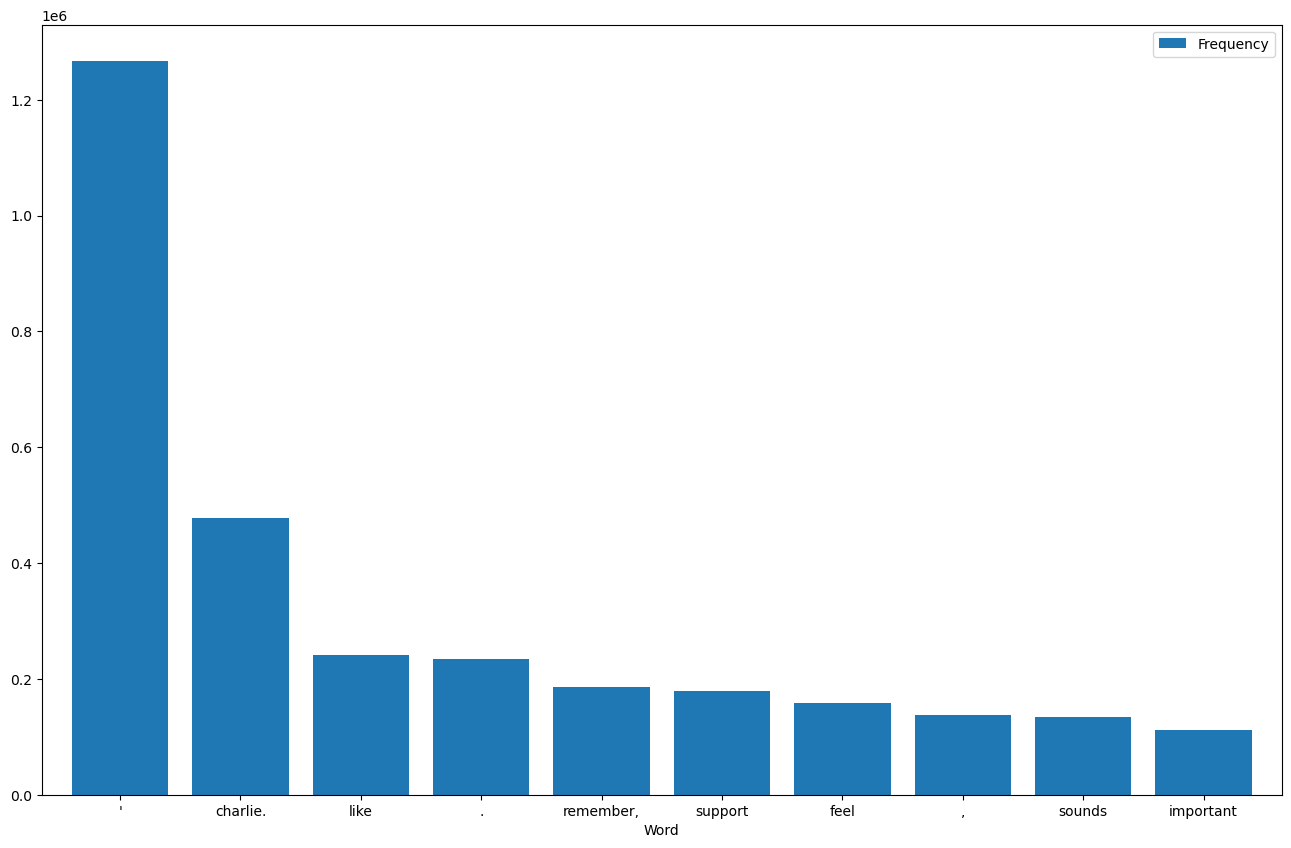

In [140]:
from collections import Counter


top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (train_df.gpt
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

# plot
rslt.plot.bar(rot=0, figsize=(16,10), width=0.8)

In [141]:
rslt = pd.DataFrame(Counter(words).most_common(50),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)

                Frequency
Word                     
'                 1266126
charlie.           477045
like               240552
.                  234637
remember,          186758
support            178459
feel               157685
,                  137381
sounds             134685
important          111807
?                  111520
charlie,           111119
help               110538
explore            105153
remember            97257
towards             93162
step                89026
hear                88896
takes               88724
tell                86067
take                78337
let'                74520
sense               74369
would               70982
work                70238
specific            69400
healing             68702
anything            66570
find                65939
understandable      65132
way.                64367
feelings            64030
challenging         61382
seeking             61381
feeling             60562
need                60137
wonderful   

In [81]:
new_train_df = pd.DataFrame(columns=['user','chatbot'])
new_train_df

Empty DataFrame
Columns: [user, chatbot]
Index: []

In [82]:
new_train_df = train_df.iloc[0]['human']

In [83]:
train_df['gpt'][3]

"It's great to hear that you're already implementing some helpful strategies. Remember, progress takes time, and it's okay to have setbacks. In addition to what you're already doing, I encourage you to also communicate with your supervisor or team about your workload and discuss possible solutions together."

In [42]:
train_df.to_csv('data/train.csv', index=False)

#### list of dataframes
cbt_df\
therapy_df\
train_df\
ocd_df\
more_therapy_df\
pdf_therapy_df\
counsel_chat_df\
counsel_chat_question_answer\

In [43]:
# Now we combine all into a single dataframe, to do that we make them of thesame columns
# We rename all columns to Patient and Virtual_Therapist

print(f'cbt_df column name : {gpt_df1.columns}')
print(f'therapy_df column name : {gpt_df2.columns}')
print(f'train_df column name : {gpt_df3.columns}')
print(f'ocd_df column name : {gpt_df4.columns}')
print(f'more_therapy_df column name : {gpt_df5.columns}')
print(f'pdf_therapy_df column name : {gpt_df6.columns}')
print(f'counsel_chat_df column name : {counsel_chat_df.columns}')
print(f'counsel_chat_question_answer column name : {counsel_chat_question_answer.columns}')

cbt_df column name : Index(['Question', 'Answer'], dtype='object')
therapy_df column name : Index(['question', 'answer'], dtype='object')
train_df column name : Index(['question', 'answer'], dtype='object')
ocd_df column name : Index(['question', 'answer'], dtype='object')
more_therapy_df column name : Index(['question', 'answer'], dtype='object')
pdf_therapy_df column name : Index(['therapist', 'patient'], dtype='object')
counsel_chat_df column name : Index(['questionText', 'answerText'], dtype='object')
counsel_chat_question_answer column name : Index(['questionText', 'answerText'], dtype='object')


In [44]:
def rename_columns(df):
    """ Rename columns of dataFrame
        
        # Parameters
        df: pandas dataframe

        # return: pandas dataFrame with renamed columns
    """
    df.columns = ['user','chatbot']

#combined all dataframes in a list
dataframes_list = [gpt_df1, gpt_df2, gpt_df3, gpt_df4, gpt_df5, 
                   gpt_df6, 
                   counsel_chat_df, 
                   counsel_chat_question_answer,
                  data_1, data_2, data_3, data_4, data_5, data_6, data_7, data_8,added_data]

for dataframe in dataframes_list:
    rename_columns(dataframe)

In [45]:
added_data

user  \
0      Can we make this quick?  Roxanne Korrine and A...   
1      Well I thought we'd start with pronunciation i...   
2      Not the hacking and gagging and spitting part....   
3      You're asking me out.  That's so cute. What's ...   
4      No no it's my fault -- we didn't have a proper...   
...                                                  ...   
29995                                       But why now?   
29996                                      I feel giddy.   
29997  But Maude you don't understand. I love you. Do...   
29998                 Oh Harold don't upset yourself so.   
29999  Never! Never! I'll never forget you. I wanted ...   

                                                 chatbot  
0      Well I thought we'd start with pronunciation i...  
1      Not the hacking and gagging and spitting part....  
2      Okay... then how 'bout we try out some French ...  
3                                             Forget it.  
4                                               Cameron.  
...                                                  ...  
29995          I thought eighty was a good round number.  
29996  But Maude you don't understand. I love you. Do...  
29997                 Oh Harold don't upset yourself so.  
29998               It's true. I can't live without you.  
29999  Oh! That's wonderful Harold. Go - and love som...  

[30000 rows x 2 columns]

In [66]:
added_data

user  \
0      Can we make this quick?  Roxanne Korrine and A...   
1      Well I thought we'd start with pronunciation i...   
2      Not the hacking and gagging and spitting part....   
3      You're asking me out.  That's so cute. What's ...   
4      No no it's my fault -- we didn't have a proper...   
...                                                  ...   
29995                                       But why now?   
29996                                      I feel giddy.   
29997  But Maude you don't understand. I love you. Do...   
29998                 Oh Harold don't upset yourself so.   
29999  Never! Never! I'll never forget you. I wanted ...   

                                                 chatbot  
0      Well I thought we'd start with pronunciation i...  
1      Not the hacking and gagging and spitting part....  
2      Okay... then how 'bout we try out some French ...  
3                                             Forget it.  
4                                               Cameron.  
...                                                  ...  
29995          I thought eighty was a good round number.  
29996  But Maude you don't understand. I love you. Do...  
29997                 Oh Harold don't upset yourself so.  
29998               It's true. I can't live without you.  
29999  Oh! That's wonderful Harold. Go - and love som...  

[30000 rows x 2 columns]

In [67]:
another_data  = [gpt_df1, gpt_df2, gpt_df3, gpt_df4, 
                   gpt_df5, gpt_df6,
                  counsel_chat_df, 
                   counsel_chat_question_answer]

In [47]:
data_3

user  \
0   Yeah, I've been feeling really low and I think...   
1                                              I mean   
2   years ago I you know, felt had some of these s...   
3                                               Yeah,   
4                 Yeah. I haven't been able to sleep.   
5                 This has been going on for a month.   
6                                                Yeah   
7   I haven't really thought about it. But I mean,...   
8                      I just noticed that most of my   
9   No, I mean, I still try, you know, you know, t...   
10  Yeah, I mean, I haven't really been eating tha...   
11  Correct. It's really hard for me to fall aslee...   
12                                              Yeah.   
13                           No, not really like that   
14                                                No.   
15  no, I mean, like not really no, like, I don't ...   
16  Yeah, it's it's hard to concentrate at work an...   
17                             Nothing like that. No.   
18                                          what work   
19                                         at home to   
20   I want to play with my cat I usually like my ...   
21                                                 NO   
22                                            Nothing   
23                                                No.   
24                                          No. Never   
25                                   like make mania,   
26  nothing Nothing's in there significance happen...   
27                                   Yeah. All right.   
28                                                NaN   
29                                                NaN   
30                                                NaN   
31                                                NaN   
32                                                NaN   
33                                                NaN   
34                                                NaN   
35                                                NaN   
36                                                NaN   
37                                                NaN   
38                                                NaN   
39                                                NaN   
40                                                NaN   
41                                                NaN   
42                                                NaN   
43                                                NaN   
44                                                NaN   
45                                                NaN   
46                                                NaN   
47                                                NaN   
48                                                NaN   
49                                                NaN   
50                                                NaN   
51                                                NaN   
52                                                NaN   
53                                                NaN   

                                              chatbot  
0   sure you understand you've been having some sy...  
1                   You think you might be depressed?  
2            Have you ever felt this way in the past?  
3   having any feelings of sad sadness, hopelessness?  
4                                               yeah?  
5                                   trouble sleeping?  
6   Have you noticed a change in your ability to e...  
7   most time you're sad, but you still have fun. ...  
8   Any change in your appetite or weight in the l...  
9   And you mentioned the sleep disturbance not be...  
10        So that's been affecting your energy level?  
11  Do you feel restless or the opposite kind of s...  
12    have been having any feelings of worthlessness?  
13                                         like that?  
14  How about your concentration level any changes...  
15  Have you been

In [48]:
gpt_df1

user  \
0   I always mess things up. Why can't I do anythi...   
1   I'm terrified of public speaking. How can I ov...   
2   I can't stop worrying about the future. How do...   
3   I always assume people are judging me negative...   
4   I've been feeling really low lately. What can ...   
5   I keep having flashbacks to a traumatic event....   
6   I'm always comparing myself to others and feel...   
7   I have a big project due and I'm feeling overw...   
8   I'm having trouble sleeping due to racing thou...   
9   I'm struggling with low self-esteem. How can I...   
10  I've been diagnosed with panic disorder. What ...   
11  I'm terrified of having another panic attack. ...   
12  During a panic attack, I feel like I can't bre...   
13  I've started avoiding places where I've had pa...   
14  I'm constantly monitoring my body for signs of...   
15  I'm worried my panic attacks mean I'm going cr...   
16  Sometimes I feel dizzy or lightheaded, which t...   
17  I've started to fear my own anxious thoughts. ...   
18  I'm worried about having a panic attack at wor...   
19  I've been doing better, but I'm scared of rela...   
20  I've been having these intense episodes where ...   
21  They seem to come out of nowhere and last abou...   
22  Panic disorder? I've never heard of that. Does...   
23  I've noticed I'm always on edge, worried about...   
24  I'm afraid I'll lose control or have a heart a...   
25  I've started avoiding crowded places because I...   
26  Sometimes I feel short of breath or dizzy, and...   
27  I've noticed my thoughts race before a panic a...   
28  I'm worried this will affect my job. How can I...   
29  This all sounds helpful, but will I ever be cu...   

                                              chatbot  
0   This sounds like an example of 'all-or-nothing...  
1   CBT would approach this with exposure therapy ...  
2   CBT uses several techniques for this. One is '...  
3   This is an example of 'mind reading', another ...  
4   CBT emphasizes the connection between thoughts...  
5   CBT for trauma often involves techniques like ...  
6   This involves the CBT concept of unhelpful thi...  
7   CBT would approach this with problem-solving t...  
8   CBT for insomnia involves several techniques. ...  
9   CBT addresses self-esteem by identifying and c...  
10  Panic disorder is characterized by recurring, ...  
11  It's common to fear panic attacks, but this fe...  
12  This sensation is a common symptom of panic at...  
13  While avoidance might feel safe, it actually r...  
14  This hyper-vigilance is common in panic disord...  
15  These fears are common but unfounded. In CBT, ...  
16  Dizziness can be a symptom of anxiety and pani...  
17  This fear of fear is common in panic disorder....  
18  We'll develop a specific coping plan for work ...  
19  Fear of relapse is normal. In CBT, we'll devel...  
20  What you're describing sounds like it could be...  
21  What you're experiencing is consistent with pa...  
22  Having panic disorder doesn't mean there's som...  
23  Yes, this anticipatory anxiety is a common fea...  
24  These fears are common, but it's important to ...  
25  While avoidance might feel safe, it actually r...  
26  These sensations can be triggers for panic. We...  
27  Absolutely. In CBT, we focus a lot on our thou...  
28  That's a valid concern. We'll develop a specif...  
29  While we don't typically use the term 'cured,'...

In [49]:
gpt_df2

user  \
0   I've been feeling really anxious about my job ...   
1   Well, I made a mistake last week in a report, ...   
2   My boss pointed out the mistake and asked me t...   
3   I can double-check my work and ask for help if...   
4   I think it will help me feel more confident an...   
..                                                ...   
87  I could repeat a calming phrase to myself, lik...   
88  I avoid exercise because it increases my heart...   
89  I'll try incorporating gentle exercise into my...   
90  I feel like I can't escape during a panic atta...   
91  I could carry a small calming object or focus ...   

                                              chatbot  
0   Let's examine that thought. What evidence do y...  
1   It's understandable to feel concerned about ma...  
2   Feeling embarrassed is a natural reaction. Wha...  
3   Those are excellent strategies. How do you thi...  
4   Great. Let's also look at the worst-case scena...  
..                                                ...  
87  That's a helpful technique. Having a reassurin...  
88  Exercise can actually help reduce anxiety in t...  
89  Excellent. Physical activity can release endor...  
90  Feeling trapped can intensify anxiety. Identif...  
91  That's a good strategy. Having tools at hand c...  

[92 rows x 2 columns]

In [50]:
gpt_df3

user  \
0   I keep having intrusive thoughts that somethin...   
1   I fear that I'll harm someone if I don't wash ...   
2           But what if something bad really happens?   
3   I know it's irrational, but the anxiety is ove...   
4   I could start by touching a doorknob without w...   
5   I worry that my family will be in danger if I ...   
6   I don't have evidence that anything bad will h...   
7   I feel like I have to repeat certain actions u...   
8   I can try to delay the ritual for a few minute...   
9   I avoid situations that trigger my OCD to prev...   
10  I avoid touching public surfaces to prevent co...   
11  I worry that if I don't check the stove multip...   
12  I can try setting a specific limit on how many...   
13      I feel ashamed and embarrassed by my rituals.   
14  I haven't thought about that. It might be help...   
15  I feel exhausted from constantly battling my OCD.   
16  I enjoy painting but haven't had the energy to...   
17  I worry that if I don't perform my rituals per...   
18  I fear that if I stop my rituals, my anxiety w...   
19  I spend hours organizing and arranging things ...   
20  I fear that if I don't arrange things perfectl...   
21  I don't have any specific examples, but the fe...   
22  I feel like I have to confess or apologize rep...   
23  I could try sitting with the discomfort and re...   
24  I avoid certain numbers and colors because the...   
25  I can try exposing myself to these triggers an...   
26  I have intrusive thoughts about harming others...   
27  But what if these thoughts mean I'm a bad person?   
28  I feel guilty for having these thoughts, even ...   
29  I could remind myself that having these though...   
30  I constantly check things to make sure they're...   
31  I could try setting a timer for how long I all...   
32  I'm worried that if I don't check, something b...   
33  I feel like I have to pray or repeat certain p...   
34  I worry that if I stop these rituals, I'll los...   
35  I feel like I'm constantly fighting against my...   
36  I enjoy gardening but haven't had the energy t...   
37  I avoid watching certain movies or reading cer...   
38  I worry that if I expose myself to triggers, m...   
39  I feel like I have to repeat tasks until they ...   
40  I could try deliberately leaving a task unfini...   
41  I obsessively worry about things being contami...   
42  I could start by touching lightly soiled objec...   
43  I avoid public places because I'm afraid of en...   
44  I could start by visiting a less crowded place...   
45  I feel like I have to count or repeat certain ...   
46  I worry that if I don't count or repeat, somet...   
47  I constantly seek reassurance from others to a...   
48  I could try sitting with the uncertainty and r...   
49  I have intrusive thoughts about harming myself...   
50  But the thoughts are so vivid and scary, I wor...   
51  I avoid using certain objects or touching spec...   
52  I could start by touching the feared object fo...   
53  I worry that if I don't perform my rituals per...   
54  I could deliberately leave something undone an...   
55  I feel like I'm losing control when my OCD sym...   
56  I enjoy playing music but haven't had the focu...   
57  I worry that if I expose myself to triggers, m...   
58  I avoid making decisions because I fear making...   

                                              chatbot  
0   Intrusive thoughts are common in OCD. Let's st...  
1   That sounds distressing. Washing rituals are a...  
2   It's natural to have these fears, but remember...  
3   Absolutely. Let's create a hierarchy of exposu...  
4   That's a good start. As you resist the urge to...  
5   These concerns are typical in OCD. Let's pract...  
6   Fear can be powerful, even in the absence of e...  
7   Perfectionism and needing things to feel 'just...  
8   That's a helpful strategy. Delaying rituals an...  
9   Avoidance can provide short-term relief but re...  
10  Let's cr

In [51]:
gpt_df4

user  \
0   I feel tense and on edge most of the time, eve...   
1   No, I haven't. How can deep breathing help wit...   
2   I'll try practicing deep breathing when I feel...   
3   I avoid situations that make me anxious, but i...   
4   I could start by exposing myself to mildly anx...   
5   I worry constantly about bad things happening,...   
6       I struggle to find evidence against my fears.   
7   I feel like my anxiety is out of control, and ...   
8   I could try using a grounding technique like d...   
9   I worry about what others think of me and fear...   
10  I could try attending a social event and focus...   
11  I feel physical symptoms like racing heart and...   
12  I'll try progressive muscle relaxation to see ...   
13  I feel like I'm constantly worrying about ever...   
14  I could try setting aside 10 minutes each day ...   
15  I avoid situations where I might feel trapped ...   
16  I could start by gradually exposing myself to ...   
17  I feel like my anxiety is affecting my sleep a...   
18  No, but I'm willing to try. What are some effe...   
19  I worry that if I don't solve problems immedia...   
20                       How can I manage my anxiety?   
21        What can I do about my depressive thoughts?   
22               How do I handle overwhelming stress?   
23           I struggle with self-esteem. Any advice?   
24    How can I break the cycle of negative thinking?   
25                What's the role of behavior in CBT?   
26            How can I challenge irrational beliefs?   
27                       What's the ABC model in CBT?   
28                  How do I cope with panic attacks?   
29                        Can CBT help with insomnia?   

                                              chatbot  
0   Persistent feelings of tension and worry are c...  
1   Deep breathing exercises can activate the body...  
2   That's a proactive step. Consistent practice c...  
3   Avoidance can provide short-term relief but re...  
4   That's a good plan. Exposure therapy combined ...  
5   Catastrophic thinking is common in anxiety dis...  
6   It can be challenging, but let's work together...  
7   It's understandable to feel overwhelmed. Let's...  
8   That's a great technique. Grounding exercises ...  
9   Social anxiety can be challenging. Let's work ...  
10  That's an excellent approach. Gradual exposure...  
11  Physical symptoms are a common part of anxiety...  
12  That's a good choice. Progressive muscle relax...  
13  Chronic worry is a hallmark of generalized anx...  
14  That's a proactive approach. Structured worry ...  
15  Avoidance can limit your life and reinforce an...  
16  That's a good plan. Facing feared situations g...  
17  Anxiety can disrupt sleep patterns. Let's expl...  
18  Effective sleep hygiene includes maintaining a...  
19  Urgency and worry about potential threats are ...  
20  CBT helps by identifying negative thought patt...  
21  CBT focuses on challenging distorted beliefs a...  
22  CBT teaches relaxation techniques and stress m...  
23  CBT targets self-critical thoughts and encoura...  
24  CBT involves recognizing cognitive distortions...  
25  CBT emphasizes changing behaviors that reinfor...  
26  CBT encourages examining evidence for and agai...  
27  The ABC model stands for Activating event, Bel...  
28  CBT teaches relaxation techniques and gradual ...  
29  Yes, CBT-I (CBT for insomnia) addresses sleep-...

In [52]:
gpt_df5

user  \
0   I messed up a presentation at work today. I'm ...   
1   It's saying I'm stupid, that I'll never be goo...   
2                I guess I could call it 'The Bully'.   
3               I'm not sure... The Bully is so loud.   
4   Well, I did manage to answer most of the quest...   
5   I guess I could say I was underprepared for so...   
6          Maybe... from failing again in the future?   
7   I could review what parts I struggled with and...   
8   Okay, I could say something like, 'I may have ...   
9                 It feels better. Less overwhelming.   
10  I felt that I'm not interesting, that I bored ...   
11        How can we address this negative self-talk?   
12           What's the Rational Coach's perspective?   
13           Should you stew about it or take action?   
14  What if you didn't get an assignment at work o...   
15        How can I challenge my negative self-image?   
16              What if I feel overwhelmed by stress?   
17              How do I cope with social situations?   
18                Can CBT help with anger management?   
19                What's the role of exposure in CBT?   
20                  How can I improve my self-esteem?   
21  What's the connection between thoughts and emo...   
22                How do I handle intrusive thoughts?   
23                 Can CBT be effective for insomnia?   
24                     What's the ABCDE model in CBT?   

                                              chatbot  
0   I hear you're feeling upset about the presenta...  
1   Thank you for sharing that. What you're descri...  
2   The Bully is a good name. Now, can we try to f...  
3   That's okay. Let's try to find it together. Di...  
4   That's great. So your healthy voice might say,...  
5   Exactly. That's a much more accurate and less ...  
6   That's a good insight. The Bully might think i...  
7   That's an excellent strategy. It addresses the...  
8   That's perfect. You're challenging the toxic l...  
9   I'm glad to hear that. Remember, the goal is n...  
10  What thoughts were going through your mind dur...  
11  Let's introduce the concept of the 'Bully'—the...  
12  The Rational Coach reminds me that our convers...  
13  The Rational Coach suggests taking action—mayb...  
14  The Bully might say I'm incompetent, but the R...  
15  The Rational Coach would encourage you to iden...  
16  The Bully might say you're incapable, but the ...  
17  The Rational Coach advises practicing social s...  
18  Yes, CBT techniques can help you recognize ang...  
19  Exposure therapy helps desensitize you to fear...  
20  The Rational Coach would challenge self-critic...  
21  CBT emphasizes that changing thoughts can lead...  
22  The Rational Coach suggests acknowledging them...  
23  CBT-I focuses on sleep-related thoughts and be...  
24  ABCDE stands for Activating event, Beliefs, Co...

In [53]:
counsel_chat_df

user  \
0    I'm going through some things with my feelings...   
1    I'm going through some things with my feelings...   
2    I have so many issues to address. I have a his...   
3    I have so many issues to address. I have a his...   
4    I have so many issues to address. I have a his...   
..                                                 ...   
424    How does a person start the counseling process?   
425    How does a person start the counseling process?   
426    How does a person start the counseling process?   
427    How does a person start the counseling process?   
428  I start counseling/therapy in a few days (I'm ...   

                                               chatbot  
0    If everyone thinks you're worthless, then mayb...  
1    Hello, and thank you for your question and see...  
2    It is never too late to get help and begin mak...  
3    You have been through so much and it sounds li...  
4    Absolutely not.  I strongly recommending worki...  
..                                                 ...  
424  Most counselors are very approachable and many...  
425  Hi! Great question! My suggestion would be to ...  
426  Hello. Counseling often begins way before the ...  
427  Usually people call me by phone, they introduc...  
428  People do cry in therapy sometimes, but it's n...  

[429 rows x 2 columns]

In [54]:
counsel_chat_question_answer

user  \
0     My wife and mother are having tense disagreeme...   
1     I'm planning to have baby, so I have to quit s...   
2     I have secrets in my mind, and I don't know wh...   
3     I am extremely possessive in my relationships ...   
4     I had a head injury a few years ago and my min...   
...                                                 ...   
1477  My grandson's step-mother sends him to school ...   
1478  My boyfriend is in recovery from drug addictio...   
1479  The birth mother attempted suicide several tim...   
1480  I think adult life is making him depressed and...   
1481  I just took a job that requires me to travel f...   

                                                chatbot  
0     <p>What you are describing is something psycho...  
1     <p>Hi. Good for you in planning ahead to do wh...  
2     <p>It sounds like keeping the secrets has beco...  
3     <p>Hi there. It's great you are able to realiz...  
4     <p>You didn't say what or how many medications...  
...                                                 ...  
1477  <p>Absolutely not!&nbsp;</p><p>It is never in ...  
1478  <p>I'm sorry you have tension between you and ...  
1479  <p>The true answer is, "no one can really say ...  
1480  <p>How do you help yourself to believe you req...  
1481                    <p>hmm this is a tough one!</p>  

[1482 rows x 2 columns]

In [55]:
train_df

human  \
0       I've been feeling so sad and overwhelmed latel...   
1       I recently got a promotion at work, which I th...   
2       Well, the workload has increased significantly...   
3       I've been trying to prioritize my tasks and de...   
4       You're right. I haven't really opened up about...   
...                                                   ...   
807080  She's been incredibly patient and understandin...   
807081  I think it stems from unresolved trauma, Alex....   
807082  It has affected my work, friendships, and over...   
807083  I want to break free from the grip of addictio...   
807084  Absolutely, Alex. I believe that seeking profe...   

                                                      gpt  
0       Hey there, I'm here to listen and support you....  
1       I can understand how it can be overwhelming wh...  
2       It sounds like you're dealing with a lot of pr...  
3       It's great to hear that you're already impleme...  
4       It's completely normal to feel that way, but r...  
...                                                   ...  
807080  The fact that your girlfriend cares deeply abo...  
807081  Trauma can often be a factor in addiction, Cha...  
807082  It's completely understandable that addiction ...  
807083  Charlie, your determination to overcome addict...  
807084  That's a wonderful mindset, Charlie. Remember,...  

[807085 rows x 2 columns]

In [56]:
combined_df = pd.concat(dataframes_list, axis=0)
combined_df

user  \
0      I always mess things up. Why can't I do anythi...   
1      I'm terrified of public speaking. How can I ov...   
2      I can't stop worrying about the future. How do...   
3      I always assume people are judging me negative...   
4      I've been feeling really low lately. What can ...   
...                                                  ...   
29995                                       But why now?   
29996                                      I feel giddy.   
29997  But Maude you don't understand. I love you. Do...   
29998                 Oh Harold don't upset yourself so.   
29999  Never! Never! I'll never forget you. I wanted ...   

                                                 chatbot  
0      This sounds like an example of 'all-or-nothing...  
1      CBT would approach this with exposure therapy ...  
2      CBT uses several techniques for this. One is '...  
3      This is an example of 'mind reading', another ...  
4      CBT emphasizes the connection between thoughts...  
...                                                  ...  
29995          I thought eighty was a good round number.  
29996  But Maude you don't understand. I love you. Do...  
29997                 Oh Harold don't upset yourself so.  
29998               It's true. I can't live without you.  
29999  Oh! That's wonderful Harold. Go - and love som...  

[32642 rows x 2 columns]

In [71]:
another_combined_df = pd.concat(another_data, axis=0)
another_combined_df

user  \
0     I always mess things up. Why can't I do anythi...   
1     I'm terrified of public speaking. How can I ov...   
2     I can't stop worrying about the future. How do...   
3     I always assume people are judging me negative...   
4     I've been feeling really low lately. What can ...   
...                                                 ...   
1477  My grandson's step-mother sends him to school ...   
1478  My boyfriend is in recovery from drug addictio...   
1479  The birth mother attempted suicide several tim...   
1480  I think adult life is making him depressed and...   
1481  I just took a job that requires me to travel f...   

                                                chatbot  
0     This sounds like an example of 'all-or-nothing...  
1     CBT would approach this with exposure therapy ...  
2     CBT uses several techniques for this. One is '...  
3     This is an example of 'mind reading', another ...  
4     CBT emphasizes the connection between thoughts...  
...                                                 ...  
1477  <p>Absolutely not!&nbsp;</p><p>It is never in ...  
1478  <p>I'm sorry you have tension between you and ...  
1479  <p>The true answer is, "no one can really say ...  
1480  <p>How do you help yourself to believe you req...  
1481                    <p>hmm this is a tough one!</p>  

[2163 rows x 2 columns]

In [72]:
another_combined_df.dropna(inplace=True)
another_combined_df

user  \
0     I always mess things up. Why can't I do anythi...   
1     I'm terrified of public speaking. How can I ov...   
2     I can't stop worrying about the future. How do...   
3     I always assume people are judging me negative...   
4     I've been feeling really low lately. What can ...   
...                                                 ...   
1477  My grandson's step-mother sends him to school ...   
1478  My boyfriend is in recovery from drug addictio...   
1479  The birth mother attempted suicide several tim...   
1480  I think adult life is making him depressed and...   
1481  I just took a job that requires me to travel f...   

                                                chatbot  
0     This sounds like an example of 'all-or-nothing...  
1     CBT would approach this with exposure therapy ...  
2     CBT uses several techniques for this. One is '...  
3     This is an example of 'mind reading', another ...  
4     CBT emphasizes the connection between thoughts...  
...                                                 ...  
1477  <p>Absolutely not!&nbsp;</p><p>It is never in ...  
1478  <p>I'm sorry you have tension between you and ...  
1479  <p>The true answer is, "no one can really say ...  
1480  <p>How do you help yourself to believe you req...  
1481                    <p>hmm this is a tough one!</p>  

[2064 rows x 2 columns]

In [61]:
sampled_combined_df = combined_df.sample(frac=0.019, random_state=0).reset_index(drop=True)
sampled_combined_df

user  \
0                                                Gary?   
1    It was her voice.  On the radio.  It was Jamie...   
2                                    What's he saying?   
3                               I'm trying Marie Okay?   
4    I've been buying you stuff all week. I've been...   
..                                                 ...   
615   I was thinking the Poconos Charlie. Maybe Vegas.   
616                                           A cop...   
617  Thank you.  Oh. My wife. She had a card here f...   
618                                    Where are they!   
619  Well if there is nothing more I suppose we'll ...   

                                               chatbot  
0                                          Just do it.  
1    You don't know that for sure.  It could have b...  
2    He says they're very nice.  He wants to know i...  
3                      I worry when you get like this.  
4                                             Such as?  
..                                                 ...  
615  What are you missing?  Riding your motorcycle ...  
616  I sure ain't his fairy godmother... now I'm lo...  
617  I already tossed that out.  Somethin' you shou...  
618                                           Maybe --  
619                                        No nothing.  

[620 rows x 2 columns]

In [68]:
# # re.sub('[^\w\s,]', '', contractions.fix(sampled_combined_df['patient'][10]))
# output = contractions.fix(sampled_combined_df['user'][0].lower())
# output = (re.sub('[^a-zA-Z\s,]', '',output)).split(' ')
# output = [lemmatizer.lemmatize(word) for word in output if word not in stopwords.words("english")]
# output = ' '.join(output)
# output

In [69]:
lemmatizer = WordNetLemmatizer()

def preprocess_data(data):
    """
    Clean up the text data and remove words that would reduce quality of data
    
    Parameters:
        text: str - input text
    
    Returns: 
        str - cleaned and preprocessed text
    """
    output = None
    try:
        output = contractions.fix(data.lower())
        output = (re.sub('[^a-zA-Z\s,]', '',output)).split(' ')
        output = [lemmatizer.lemmatize(word) for word in output if word not in stopwords.words("english")]
        output = ' '.join(output)
    except Exception as e:
        print(e)

    return output

In [86]:
final_df= sampled_combined_df.map(preprocess_data)

'float' object has no attribute 'lower'
'float' object has no attribute 'lower'
'float' object has no attribute 'lower'
'float' object has no attribute 'lower'


In [73]:
another_final_df = another_combined_df.map(preprocess_data)

In [92]:
final_df

patient  \
0      hey alex, feeling really today cannot help fee...   
1      yes, alex, willing try anything might make fee...   
2      absolutely, alex reflecting lot lately, realiz...   
3      well, fiance respond message promptly share fe...   
4      hi alex, hope well wanted share exciting news ...   
...                                                  ...   
15370  think am, alex scary imagine opening someone p...   
15371  think part stem fear failure worry pursue cert...   
15372  thank you, alex word guidance mean lot take ti...   
15373  yes, alex, let u explore noticed even incident...   
15374  have, fear do, might make thing worse fear jud...   

                                       virtual_therapist  
0      sorry hear that, charlie tough feel like frien...  
1      appreciate openness, charlie let u start focus...  
2      great, charlie recognizing codependent pattern...  
3      sound like certain communication pattern trigg...  
4      hello charlie, wonderful hear glad feeling exc...  
...                                                  ...  
15370  completely normal feel scared opening up, espe...  
15371  fear failure paralyzing, charlie remember, goa...  
15372  welcome, charlie selfreflection powerful tool,...  
15373  observation insightful, charlie connection mak...  
15374  completely understandable feel way, charlie op...  

[15371 rows x 2 columns]

In [93]:
final_df_ = final_df.reset_index(drop=True)# final_df.dropna(inplace=True)
final_df_

patient  \
0      hey alex, feeling really today cannot help fee...   
1      yes, alex, willing try anything might make fee...   
2      absolutely, alex reflecting lot lately, realiz...   
3      well, fiance respond message promptly share fe...   
4      hi alex, hope well wanted share exciting news ...   
...                                                  ...   
15366  think am, alex scary imagine opening someone p...   
15367  think part stem fear failure worry pursue cert...   
15368  thank you, alex word guidance mean lot take ti...   
15369  yes, alex, let u explore noticed even incident...   
15370  have, fear do, might make thing worse fear jud...   

                                       virtual_therapist  
0      sorry hear that, charlie tough feel like frien...  
1      appreciate openness, charlie let u start focus...  
2      great, charlie recognizing codependent pattern...  
3      sound like certain communication pattern trigg...  
4      hello charlie, wonderful hear glad feeling exc...  
...                                                  ...  
15366  completely normal feel scared opening up, espe...  
15367  fear failure paralyzing, charlie remember, goa...  
15368  welcome, charlie selfreflection powerful tool,...  
15369  observation insightful, charlie connection mak...  
15370  completely understandable feel way, charlie op...  

[15371 rows x 2 columns]

In [74]:
another_final_df_ = another_final_df.reset_index(drop=True)
another_final_df_

user  \
0               always mess thing cannot anything right   
1               terrified public speaking overcome fear   
2           cannot stop worrying future control thought   
3     always assume people judging negatively change...   
4                feeling really low lately improve mood   
...                                                 ...   
2059  grandson stepmother sends school pink barbie b...   
2060  boyfriend recovery drug addiction recently got...   
2061  birth mother attempted suicide several time pr...   
2062  think adult life making depressed often sleep ...   
2063  took job requires travel far away home family ...   

                                                chatbot  
0     sound like example ornothing thinking, common ...  
1     cbt would approach exposure therapy cognitive ...  
2     cbt us several technique one worry time  sched...  
3     example mind reading, another cognitive distor...  
4     cbt emphasizes connection thoughts, feelings, ...  
...                                                 ...  
2059  pabsolutely notnbspppit never child best inter...  
2060  pi sorry tension bfppa relationship mean two p...  
2061  pthe true answer is, one really say certaintyp...  
2062  phow help believe require offer youppwhat get ...  
2063                                    phmm tough onep  

[2064 rows x 2 columns]

In [75]:
another_final_df.to_csv('data/final7.csv',index=False)

In [76]:
another_combined_df.to_csv('data/final7.csv',index=False)

In [95]:
final_df.to_csv('data/final.csv',index=False)

In [92]:
obstacles = {}


In [93]:
obstacles[1,2] = '3'

In [94]:
obstacles.get((1,2))

'3'